#**Analysing Customer Purchase Behavior**



*   Introduction
*   Data Description and Source
*   Business Objective
*   Exploratory Data Analysis
*   Methodology - Supervised / Unsupervised
*   Findings and Evaluation
*   Conclusion

**Introduction**

How can we identify and analyze the factors affecting customer purchase amounts to enhance our sales strategy?

.

The source of **dataset** is from Kaggle:
https://www.kaggle.com/datasets/sanyamgoyal401/customer-purchases-behaviour-dataset

.

The main **objective** of this project is to predict customer purchase amounts using a range of demographic, behavioral, and psychological factors. This will enable us to allocate our marketing budget more effectively by targeting the appropriate market segments.


## **Importing data**

In [ ]:
import pandas as pd
import io

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving customer_data.csv to customer_data.csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['customer_data.csv']))
df

,id,age,gender,income,education,region,loyalty_status,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score
0,1,27,Male,40682,Bachelor,East,Gold,frequent,18249,Books,0,6
1,2,29,Male,15317,Masters,West,Regular,rare,4557,Clothing,1,6
2,3,37,Male,38849,Bachelor,West,Silver,rare,11822,Clothing,0,6
3,4,30,Male,11568,HighSchool,South,Regular,frequent,4098,Food,0,7
4,5,31,Female,46952,College,North,Regular,occasional,19685,Clothing,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,31,Female,19691,College,West,Regular,occasional,7075,Health,0,7
99996,99997,36,Male,17428,HighSchool,South,Regular,rare,6873,Health,0,5
99997,99998,29,Male,13222,College,West,Regular,frequent,5152,Clothing,0,5
99998,99999,31,Female,40093,Bachelor,West,Regular,frequent,16312,Health,1,5




---



##**Exploratory Data Analysis**

In [ ]:
df.head()

,id,age,gender,income,education,region,loyalty_status,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score
0,1,27,Male,40682,Bachelor,East,Gold,frequent,18249,Books,0,6
1,2,29,Male,15317,Masters,West,Regular,rare,4557,Clothing,1,6
2,3,37,Male,38849,Bachelor,West,Silver,rare,11822,Clothing,0,6
3,4,30,Male,11568,HighSchool,South,Regular,frequent,4098,Food,0,7
4,5,31,Female,46952,College,North,Regular,occasional,19685,Clothing,1,5


In [ ]:
df.tail()

,id,age,gender,income,education,region,loyalty_status,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score
99995,99996,31,Female,19691,College,West,Regular,occasional,7075,Health,0,7
99996,99997,36,Male,17428,HighSchool,South,Regular,rare,6873,Health,0,5
99997,99998,29,Male,13222,College,West,Regular,frequent,5152,Clothing,0,5
99998,99999,31,Female,40093,Bachelor,West,Regular,frequent,16312,Health,1,5
99999,100000,35,Female,22249,College,West,Silver,rare,9426,Health,0,6


In [ ]:
df.sample(5)

,id,age,gender,income,education,region,loyalty_status,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score
33597,33598,29,Female,29301,Masters,West,Regular,rare,10053,Health,0,6
38618,38619,35,Female,8999,Bachelor,North,Regular,occasional,3237,Books,0,5
661,662,36,Male,35288,College,West,Regular,frequent,13495,Electronics,0,5
35747,35748,35,Male,35277,Bachelor,West,Regular,frequent,12372,Electronics,0,4
27428,27429,30,Male,13484,College,West,Regular,rare,6305,Electronics,0,6


In [ ]:
df.shape

(100000, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   id                  100000 non-null  int64 
 1   age                 100000 non-null  int64 
 2   gender              100000 non-null  object
 3   income              100000 non-null  int64 
 4   education           100000 non-null  object
 5   region              100000 non-null  object
 6   loyalty_status      100000 non-null  object
 7   purchase_frequency  100000 non-null  object
 8   purchase_amount     100000 non-null  int64 
 9   product_category    100000 non-null  object
 10  promotion_usage     100000 non-null  int64 
 11  satisfaction_score  100000 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 9.2+ MB


In [ ]:
df.describe()

,id,age,income,purchase_amount,promotion_usage,satisfaction_score
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,30.003260,27516.269880,9634.790840,0.300800,5.009650
std,28867.657797,4.480535,12996.782587,4799.339449,0.458608,1.038714
min,1.000000,12.000000,5000.000000,1118.000000,0.000000,0.000000
25%,25000.750000,27.000000,16271.750000,5583.000000,0.000000,4.000000
50%,50000.500000,30.000000,27584.500000,9452.000000,0.000000,5.000000
75%,75000.250000,33.000000,38747.250000,13350.000000,1.000000,6.000000
max,100000.000000,49.000000,50000.000000,26204.000000,1.000000,10.000000


In [ ]:
df.isnull().sum()

id                    0
age                   0
gender                0
income                0
education             0
region                0
loyalty_status        0
purchase_frequency    0
purchase_amount       0
product_category      0
promotion_usage       0
satisfaction_score    0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.nunique()

id                    100000
age                       38
gender                     2
income                 40003
education                  4
region                     4
loyalty_status             3
purchase_frequency         3
purchase_amount        18902
product_category           7
promotion_usage            2
satisfaction_score        11
dtype: int64

In [ ]:
df.dtypes

id                     int64
age                    int64
gender                object
income                 int64
education             object
region                object
loyalty_status        object
purchase_frequency    object
purchase_amount        int64
product_category      object
promotion_usage        int64
satisfaction_score     int64
dtype: object

In [ ]:
df.columns

Index(['id', 'age', 'gender', 'income', 'education', 'region',
       'loyalty_status', 'purchase_frequency', 'purchase_amount',
       'product_category', 'promotion_usage', 'satisfaction_score'],
      dtype='object')

In [ ]:
df.count()

id                    100000
age                   100000
gender                100000
income                100000
education             100000
region                100000
loyalty_status        100000
purchase_frequency    100000
purchase_amount       100000
product_category      100000
promotion_usage       100000
satisfaction_score    100000
dtype: int64



---



In [ ]:
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
import plotly

In [ ]:
df_data = df[['age', 'income','purchase_amount','promotion_usage','satisfaction_score']]

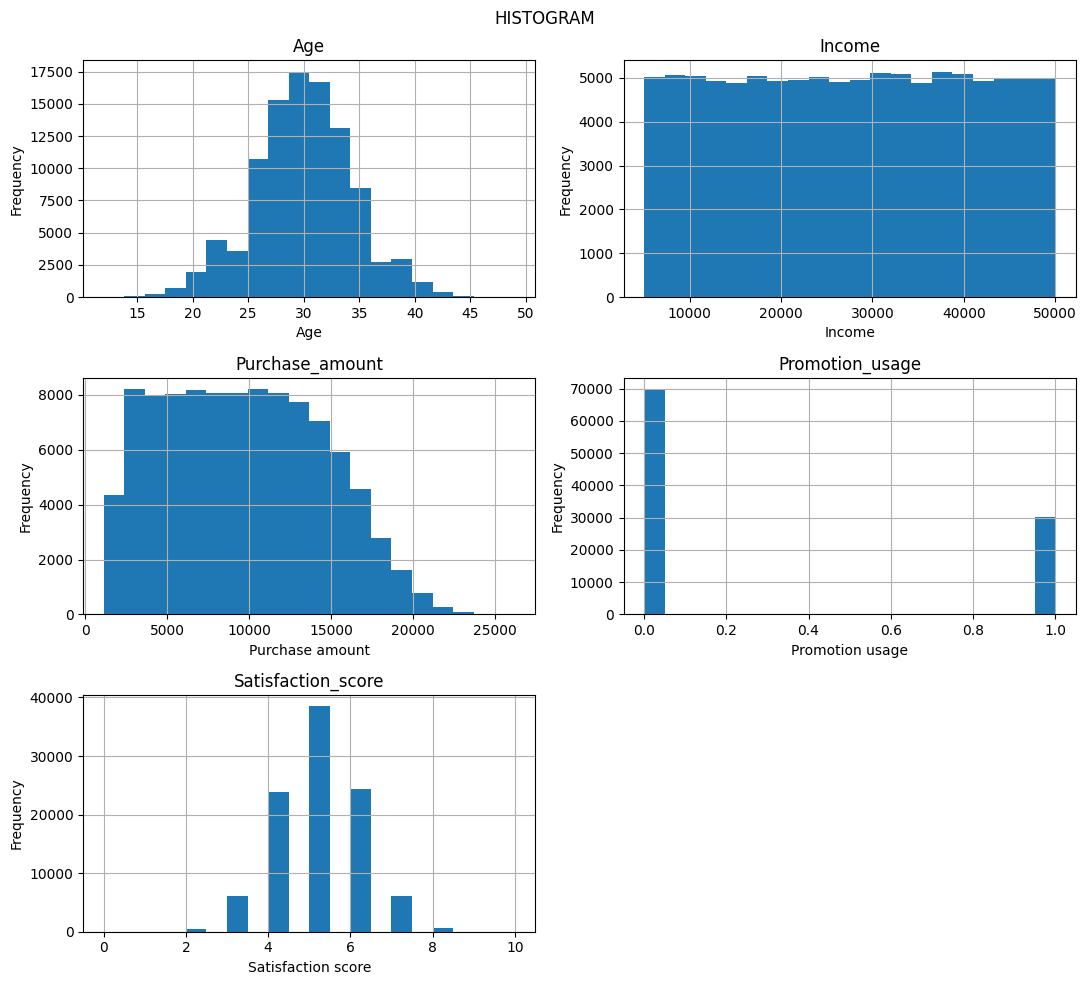

In [ ]:
import matplotlib.pyplot as plt

df_data = df[['age', 'income', 'purchase_amount', 'promotion_usage', 'satisfaction_score']]
plt.figure(figsize=(11, 10))
plt.suptitle('HISTOGRAM')

# Creating subplots
for i, column in enumerate(df_data.columns):
    plt.subplot(3, 2, i + 1)
    df_data[column].hist(bins=20)  # Adjust the number of bins as needed
    plt.title(column.capitalize())
    plt.xlabel(column.replace('_', ' ').capitalize())
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()



---



##Finding Correlation between the numeric variables

In [ ]:
corr = df_data.corr(method="pearson")
corr

,age,income,purchase_amount,promotion_usage,satisfaction_score
age,1.000000,-0.002365,-0.002089,0.001932,0.000977
income,-0.002365,1.000000,0.948441,0.000756,0.002780
purchase_amount,-0.002089,0.948441,1.000000,0.001156,0.003424
promotion_usage,0.001932,0.000756,0.001156,1.000000,0.000330
satisfaction_score,0.000977,0.002780,0.003424,0.000330,1.000000


<Axes: >

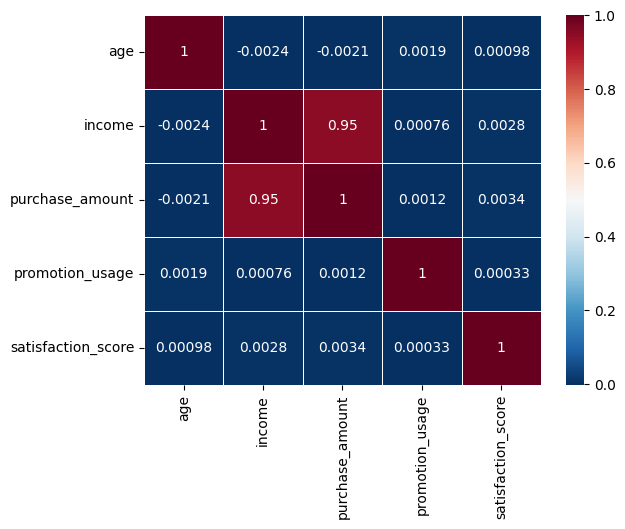

In [ ]:
sns.heatmap(corr,
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            cmap = 'RdBu_r',
            annot=True,
            linewidth=0.5)

###With this heatmap, we can see that the independent variable **Income** is highly correlated to **purchase amount**.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
le = LabelEncoder()
df['gender_encoded'] = le.fit_transform(df['gender'])
df['education_encoded'] = le.fit_transform(df['education'])
df['region_encoded'] = le.fit_transform(df['region'])
df['loyalty_status_encoded'] = le.fit_transform(df['loyalty_status'])
df['purchase_frequency_encoded'] = le.fit_transform(df['purchase_frequency'])
df['product_category_encoded'] = le.fit_transform(df['product_category'])

In [ ]:
df.head()

,id,age,gender,income,education,region,loyalty_status,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score,gender_encoded,education_encoded,region_encoded,loyalty_status_encoded,purchase_frequency_encoded,product_category_encoded
0,1,27,Male,40682,Bachelor,East,Gold,frequent,18249,Books,0,6,1,0,0,0,0,1
1,2,29,Male,15317,Masters,West,Regular,rare,4557,Clothing,1,6,1,3,3,1,2,2
2,3,37,Male,38849,Bachelor,West,Silver,rare,11822,Clothing,0,6,1,0,3,2,2,2
3,4,30,Male,11568,HighSchool,South,Regular,frequent,4098,Food,0,7,1,2,2,1,0,4
4,5,31,Female,46952,College,North,Regular,occasional,19685,Clothing,1,5,0,1,1,1,1,2


In [ ]:
df_new = df[['age', 'income','purchase_amount','promotion_usage','satisfaction_score','gender_encoded','education_encoded','region_encoded','loyalty_status_encoded','purchase_frequency_encoded','product_category_encoded']]

In [ ]:
corr_all = df_new.corr(method="pearson")
corr_all

,age,income,purchase_amount,promotion_usage,satisfaction_score,gender_encoded,education_encoded,region_encoded,loyalty_status_encoded,purchase_frequency_encoded,product_category_encoded
age,1.000000,-0.002365,-0.002089,0.001932,0.000977,0.004063,-0.001859,-0.007681,0.001255,-0.003763,-0.002254
income,-0.002365,1.000000,0.948441,0.000756,0.002780,0.000641,-0.003215,-0.002095,0.000137,-0.000081,-0.001054
purchase_amount,-0.002089,0.948441,1.000000,0.001156,0.003424,0.000081,-0.004486,-0.000119,-0.000169,-0.000224,-0.002072
promotion_usage,0.001932,0.000756,0.001156,1.000000,0.000330,0.000011,0.002739,0.001945,0.001717,0.001084,0.000837
satisfaction_score,0.000977,0.002780,0.003424,0.000330,1.000000,-0.000862,-0.004340,0.001581,0.000327,0.002699,-0.001761
gender_encoded,0.004063,0.000641,0.000081,0.000011,-0.000862,1.000000,-0.003420,-0.002717,0.004906,-0.000636,-0.002237
education_encoded,-0.001859,-0.003215,-0.004486,0.002739,-0.004340,-0.003420,1.000000,0.002242,0.005268,-0.006097,-0.000186
region_encoded,-0.007681,-0.002095,-0.000119,0.001945,0.001581,-0.002717,0.002242,1.000000,0.002099,0.001298,-0.002501
loyalty_status_encoded,0.001255,0.000137,-0.000169,0.001717,0.000327,0.004906,0.005268,0.002099,1.000000,-0.003579,-0.002518
purchase_frequency_encoded,-0.003763,-0.000081,-0.000224,0.001084,0.002699,-0.000636,-0.006097,0.001298,-0.003579,1.000000,0.000227


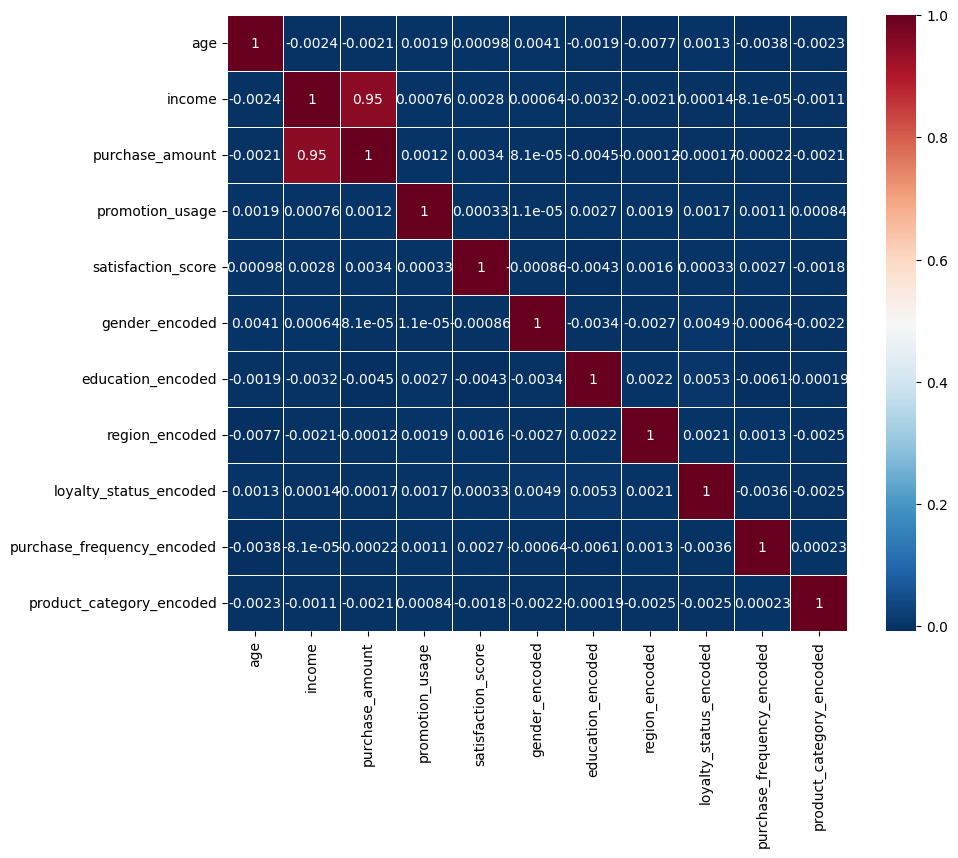

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(corr_all,
            xticklabels=corr_all.columns,
            yticklabels=corr_all.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5,
            ax=ax)  # Pass ax=ax to plot on the specific subplot

plt.show()

Even after encoding and calculating correlation among all variables, we notice that only purchase amount and income are highly correlated.



---
##**Splitting Dataset into Train and Test**


In [ ]:
from sklearn.model_selection import train_test_split

X = df[['income']]  # Independent variable
y = df['purchase_amount']  # Dependent variable

# Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



---



##**Supervised Learning: Part 1 - Regression Models:**

##**Model 1:** Regression

First we run regression using all the independent variables to see which variables are significant.

In [ ]:
import statsmodels.formula.api as smf

formula = (
    'purchase_amount ~ age + income + promotion_usage + satisfaction_score + '
    'gender_encoded + education_encoded + region_encoded + '
    'loyalty_status_encoded + purchase_frequency_encoded + product_category_encoded'
)
# Fit the OLS model
m = smf.ols(formula=formula, data=df).fit()

# Print the model summary
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:        purchase_amount   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                 8.954e+04
Date:                Sun, 21 Jul 2024   Prob (F-statistic):               0.00
Time:                        17:52:07   Log-Likelihood:            -8.7461e+05
No. Observations:              100000   AIC:                         1.749e+06
Df Residuals:                   99989   BIC:                         1.749e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

###Looking at the results we can conclude the only independent variable that is significant and impacts the model is income with a P-value <0.05.

To further test this out, we run OLS linear regression, to see the fit statistics of the purchase amount (dependent variable) and income (independent).

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train the Linear Regression Model
lr_model1 = LinearRegression()
lr_model1.fit(X_train, y_train)

# Make Predictions
y_pred = lr_model1.predict(X_test)

# Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calculate Adjusted R-squared
n = len(y_test)  # Number of observations
p = X.shape[1]  # Number of predictors
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')
print(f'Adjusted R^2 Score: {adjusted_r2}')



Mean Squared Error: 2337296.785760103
R^2 Score: 0.8980430941778186
Adjusted R^2 Score: 0.898037995822692


In [ ]:
lr_model = smf.ols(formula='purchase_amount ~ income',data=df_data).fit()
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:        purchase_amount   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                 8.954e+05
Date:                Sun, 21 Jul 2024   Prob (F-statistic):               0.00
Time:                        17:52:19   Log-Likelihood:            -8.7462e+05
No. Observations:              100000   AIC:                         1.749e+06
Df Residuals:                   99998   BIC:                         1.749e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.2924     11.263     -0.204      0.8

In [ ]:
print(f"Params: {lr_model.params}\n")
print(f"R-Squared: {lr_model.rsquared}\n")
print(f"t value: {lr_model.tvalues}\n")
print(f"p value: {lr_model.pvalues}")

Params: Intercept   -2.292403
income       0.350232
dtype: float64

R-Squared: 0.8995408123959152

t value: Intercept     -0.203529
income       946.261700
dtype: float64

p value: Intercept    0.838722
income       0.000000
dtype: float64




---



In [ ]:
lr_model2 = smf.ols(formula='purchase_amount ~ income+satisfaction_score+age+promotion_usage',data=df_data).fit()
print(lr_model2.summary())

                            OLS Regression Results                            
Dep. Variable:        purchase_amount   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                 2.238e+05
Date:                Sun, 21 Jul 2024   Prob (F-statistic):               0.00
Time:                        17:52:41   Log-Likelihood:            -8.7462e+05
No. Observations:              100000   AIC:                         1.749e+06
Df Residuals:                   99995   BIC:                         1.749e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            -26.7802     41

In [ ]:
print(f"Params: {lr_model2.params}\n")
print(f"R-Squared: {lr_model2.rsquared}\n")
print(f"t value: {lr_model2.tvalues}\n")
print(f"p value: {lr_model2.pvalues}")

Params: Intercept            -26.780190
income                 0.350231
satisfaction_score     3.635795
age                    0.163752
promotion_usage        4.596293
dtype: float64

R-Squared: 0.8995416485822297

t value: Intercept              -0.647420
income                946.242709
satisfaction_score      0.785070
age                     0.152521
promotion_usage         0.438191
dtype: float64

p value: Intercept             0.517362
income                0.000000
satisfaction_score    0.432415
age                   0.878777
promotion_usage       0.661249
dtype: float64


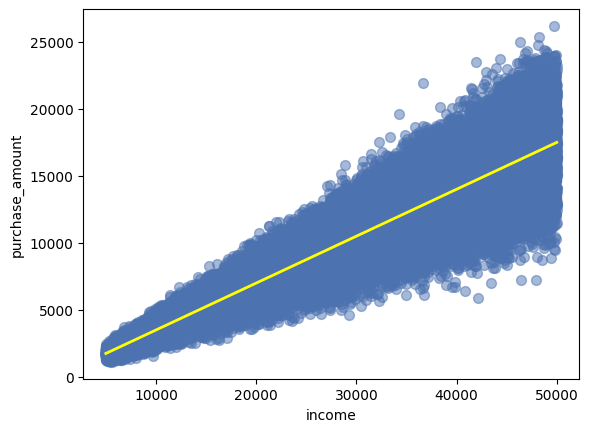

In [ ]:
sns.regplot(x='income', y='purchase_amount', data=df_data,line_kws={'color': 'yellow', 'linewidth': 2}, scatter_kws={'s': 50, 'alpha': 0.5})
sns.set_palette("deep")

plt.show()


**HYPOTHESIS TESTING**


**R-squared:** 0.900
This means that 90% of the variance in purchase_amount can be explained by income.

.

**F-statistic:** 8.954e+05, Prob (F-statistic): 0.00
This indicates that the overall model is statistically significant.

.

**Coefficients:**
**Intercept:** -2.2924 (p-value = 0.839)

The intercept is not statistically significant.

.

**Income:** 0.3502 p-value for income is 0.00 (p-value < 0.001)

The coefficient for income is 0.3502, which is statistically significant, indicating a positive relationship between income and purchase amount.

.

Hence we can reject Null hypothesis and accept Alternative hypothesis.



---



##**Model 2:**   K Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
#Train the KNN Regression Model
# Instantiate the model with n_neighbors with 5 n neighbors.

knn_model_all = KNeighborsRegressor(n_neighbors=5)
knn_model_all.fit(X_train, y_train)

# Make Predictions
y_pred = knn_model_all.predict(X_test)

# Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 2819841.7381379995
R^2 Score: 0.8769936534032007


In [ ]:
# Train the KNN Regression Model with k = 15

knn_model = KNeighborsRegressor(n_neighbors=15)
knn_model.fit(X_train, y_train)

# Make Predictions
y_pred = knn_model.predict(X_test)

# Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 2492386.604826222
R^2 Score: 0.891277809523837


# **Model 3:** Random Forest

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

##Adjusted R2
n = len(y_test)
k = X_test.shape[1]

adj_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f"Adjusted r-squared: {adj_r2}")

Mean Squared Error: 3237826.701043468
R-squared: 0.8587604304091504
Adjusted r-squared: 0.8587533677244024




---



##**Cross-Validation**

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

5-fold cross validation

In [ ]:
# Evaluate Linear Regression with cross-validation
lr_scores = cross_val_score(lr_model1, X, y, cv=5, scoring='neg_mean_squared_error')
lr_rmse_scores = np.sqrt(-lr_scores)

# Evaluate KNN Regression with cross-validation
knn_scores = cross_val_score(knn_model, X, y, cv=5, scoring='neg_mean_squared_error')
knn_rmse_scores = np.sqrt(-knn_scores)

# Evaluate Random Forest Regression with cross-validation
rf_scores = cross_val_score(rf, X, y, cv=5, scoring='neg_mean_squared_error')
rf_rmse_scores = np.sqrt(-rf_scores)

# Display the RMSE scores
print("Linear Regression RMSE: Mean =", lr_rmse_scores.mean(), "Std =", lr_rmse_scores.std())
print("KNN Regression RMSE: Mean =", knn_rmse_scores.mean(), "Std =", knn_rmse_scores.std())
print("Random Forest RMSE: Mean =", rf_rmse_scores.mean(), "Std =", rf_rmse_scores.std())
#print("Random Forest RMSE with multiple independent variables: Mean =", rf_all_rmse_scores.mean(), "Std =", rf_all_rmse_scores.std())
#print("KNN Regression w multiple RMSE: Mean =", knn_all_rmse_scores.mean(), "Std =", knn_all_rmse_scores.std())

Linear Regression RMSE: Mean = 1521.1960734577538 Std = 10.786188721885734
KNN Regression RMSE: Mean = 1570.303711255338 Std = 9.43634104822446
Random Forest RMSE: Mean = 1786.5361413217452 Std = 10.14451093385385




---



##Selecting best model based on Cross-validation results
Calculate RMSE Scores for Each Model:
We already have the RMSE scores from cross-validation for each model:

lr_rmse_scores for Linear Regression

knn_rmse_scores for K-Nearest Neighbors

rf_rmse_scores for Random Forest

Perform Paired t-tests:
We will perform paired t-tests between each pair of models to see if the differences in RMSE scores are statistically significant.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Choose the model with the lower mean RMSE
best_model = lr_model1
best_model_text = "Linear Regression"
if knn_rmse_scores.mean() < lr_rmse_scores.mean():
    best_model = knn_model
    best_model_text = "KNN Regression"
if rf_rmse_scores.mean() < lr_rmse_scores.mean() and rf_rmse_scores.mean() < knn_rmse_scores.mean():
    best_model = rf
    best_model_text = "Random Forest"


# Make predictions on the test set
y_pred = best_model.predict(X_test)

print("Best Model Selected:", best_model_text)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))
print()

# Display the predictions
print("Predictions:", y_pred[:10])

Best Model Selected: Linear Regression
Mean Squared Error: 2337296.785760103
R-squared: 0.8980430941778186

Predictions: [ 2231.86632996  7083.12364584  4186.16596039  6322.20390083
  4539.48764594 11562.500258   15812.16524902 10376.47394582
  4110.87937724 14933.23816205]




---



###10-fold Cross Validation

In [ ]:
# Evaluate Linear Regression with cross-validation
lr_scores = cross_val_score(lr_model1, X, y, cv=10, scoring='neg_mean_squared_error')
lr_rmse_scores = np.sqrt(-lr_scores)

# Evaluate KNN Regression with cross-validation
knn_scores = cross_val_score(knn_model, X, y, cv=10, scoring='neg_mean_squared_error')
knn_rmse_scores = np.sqrt(-knn_scores)

# Evaluate Random Forest Regression with cross-validation
rf_scores = cross_val_score(rf, X, y, cv=10, scoring='neg_mean_squared_error')
rf_rmse_scores = np.sqrt(-rf_scores)

# Display the RMSE scores
print("Linear Regression RMSE: Mean =", lr_rmse_scores.mean(), "Std =", lr_rmse_scores.std())
print("KNN Regression RMSE: Mean =", knn_rmse_scores.mean(), "Std =", knn_rmse_scores.std())
print("Random Forest RMSE: Mean =", rf_rmse_scores.mean(), "Std =", rf_rmse_scores.std())
#print("Random Forest RMSE with multiple independent variables: Mean =", rf_all_rmse_scores.mean(), "Std =", rf_all_rmse_scores.std())
#print("KNN Regression w multiple RMSE: Mean =", knn_all_rmse_scores.mean(), "Std =", knn_all_rmse_scores.std())

print()

# Choose the model with the lower mean RMSE
best_model = lr_model1
best_model_text = "Linear Regression"
if knn_rmse_scores.mean() < lr_rmse_scores.mean():
    best_model = knn_model
    best_model_text = "KNN Regression"
if rf_rmse_scores.mean() < lr_rmse_scores.mean() and rf_rmse_scores.mean() < knn_rmse_scores.mean():
    best_model = rf_model
    best_model_text = "Random Forest"

Linear Regression RMSE: Mean = 1521.116781442805 Std = 18.676564855851097
KNN Regression RMSE: Mean = 1569.4907294513625 Std = 17.19399046330268
Random Forest RMSE: Mean = 1780.3115648656974 Std = 17.37703826567577



In [ ]:
# Make predictions on the test set
y_pred = best_model.predict(X_test)

print("Best Model Selected:", best_model_text)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))
print()

# Display the predictions
print("Predictions:", y_pred[:10])

Best Model Selected: Linear Regression
Mean Squared Error: 2337283.0990580847
R-squared: 0.898043691215301

Predictions: 75721     2231.488454
80184     7083.605105
19864     4186.134262
76699     6322.550573
92991     4539.518534
76434    11563.775178
84004    15814.192940
80917    10377.538778
60767     4110.834343
50074    14935.110163
dtype: float64




---



##Evaluate the Model on the Test Set (Including Random Forest)


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Display the metrics
print("MAE:", mae)
print("RMSE:", rmse)
print("R²:", r2)


MAE: 1104.7004302472135
RMSE: 1528.81754930341
R²: 0.898043691215301


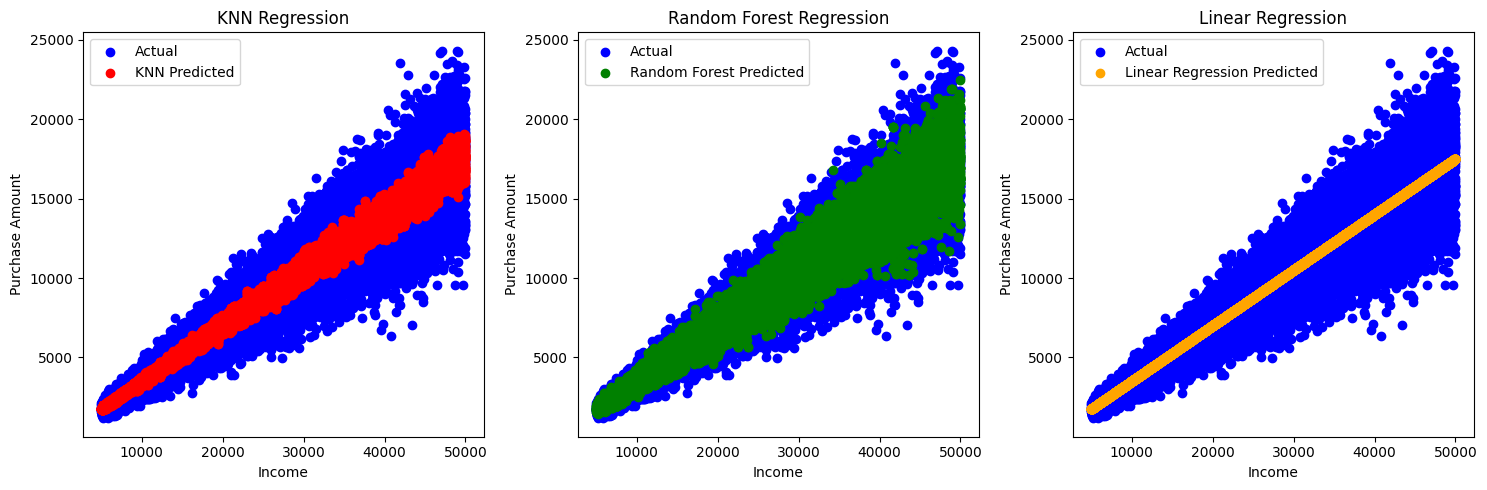

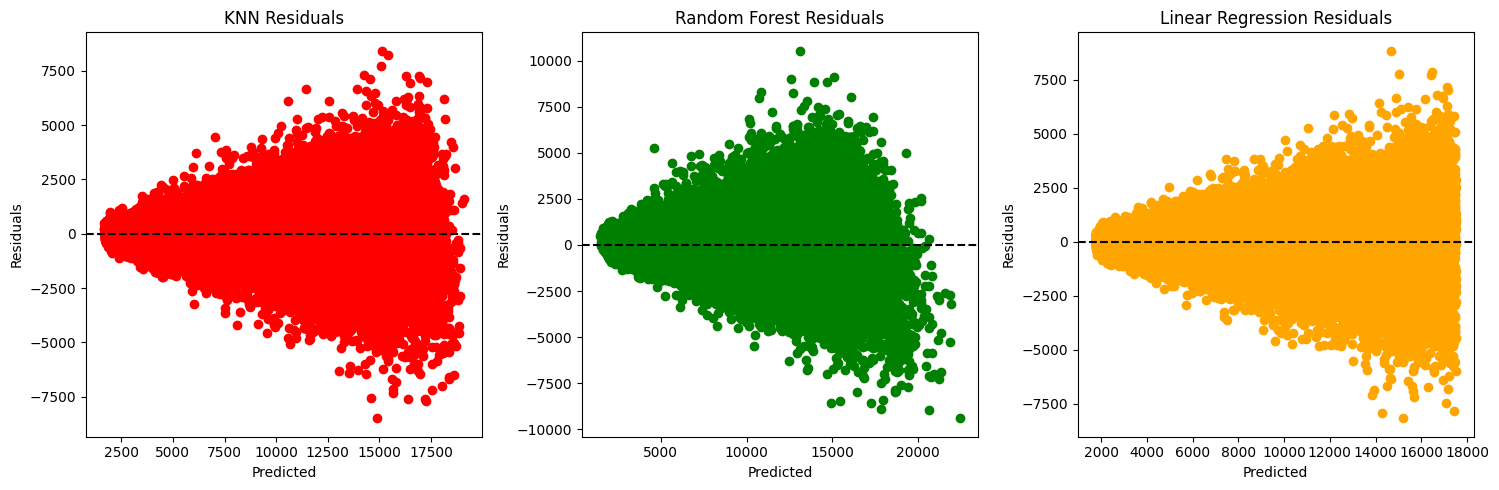

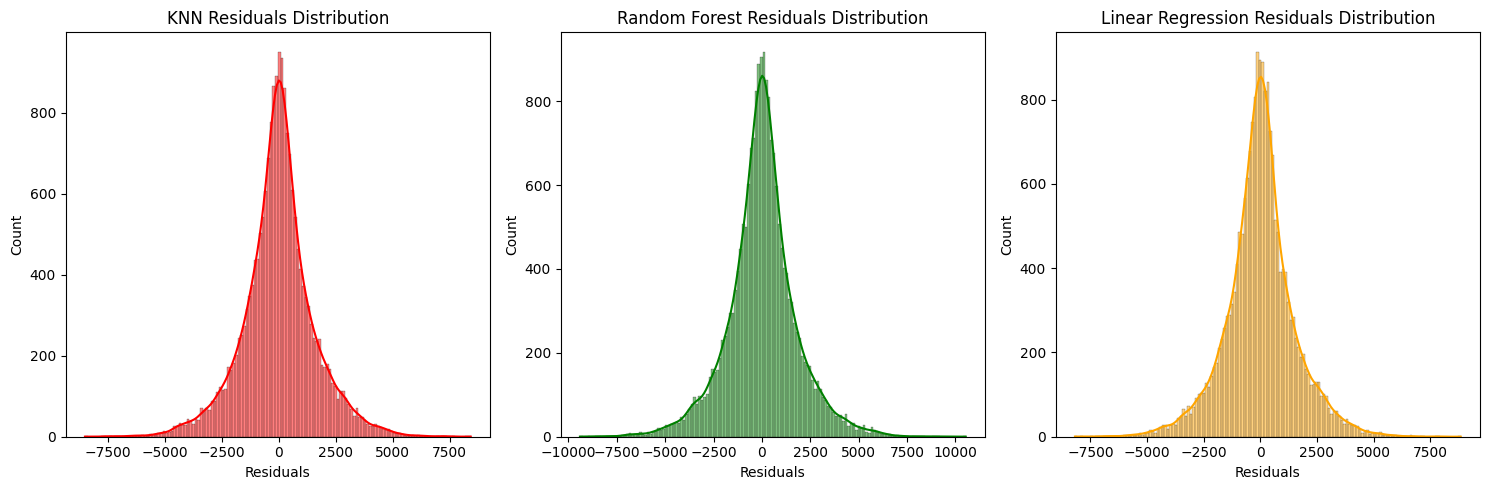

<ipython-input-41-5ce60ec57af1>:91: UserWarning: The palette list has more values (3) than needed (1), which may not be intended.
  sns.boxplot(data=[residuals_knn, residuals_rand_forest, residuals_lin_reg], palette=['red', 'green', 'orange'])


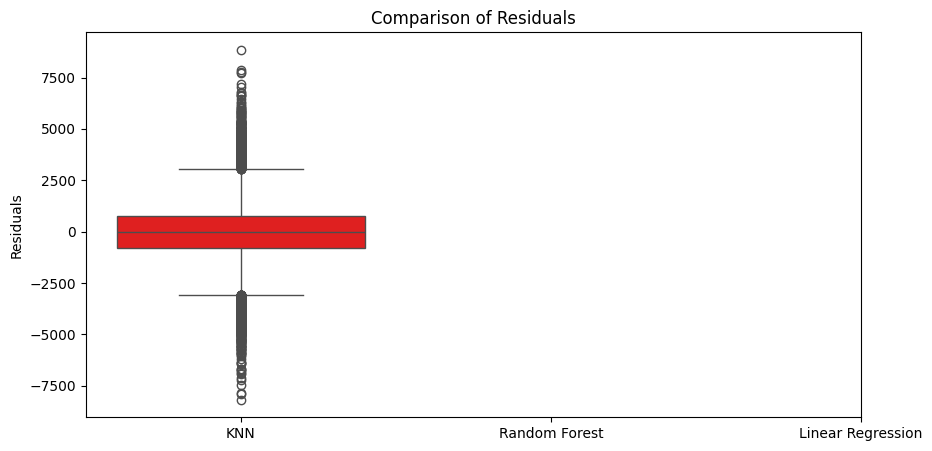

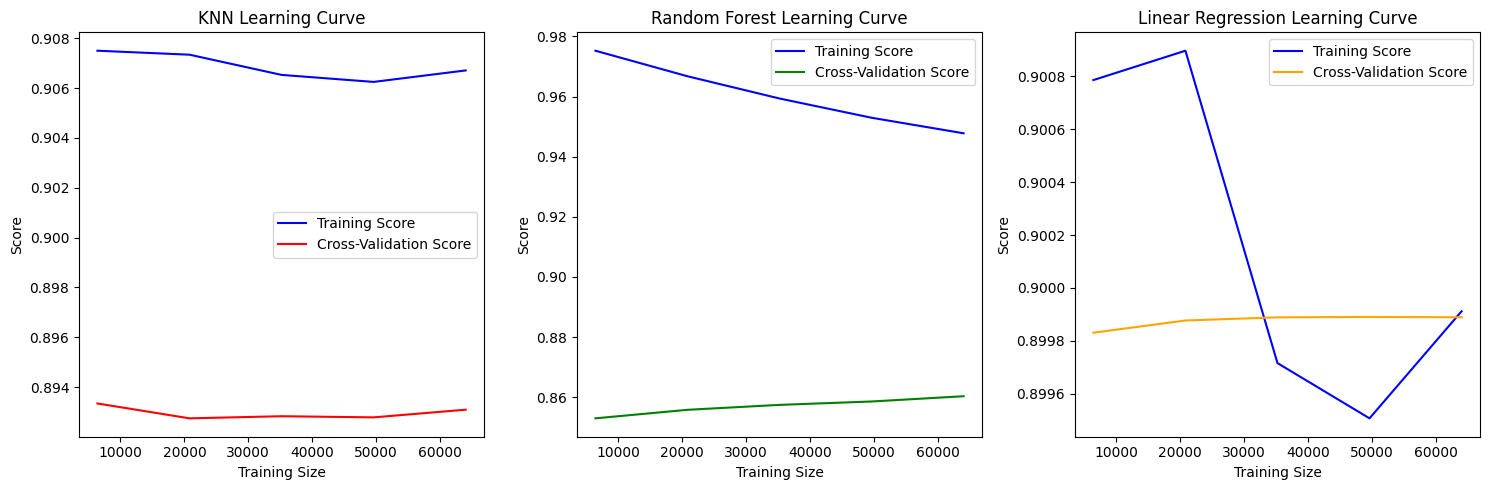

In [ ]:
# Predict on the test set
y_pred_knn = knn_model.predict(X_test)
y_pred_rand_forest = rf.predict(X_test)
y_pred_lin_reg = lr_model1.predict(X_test)

# Calculate errors
residuals_knn = y_test - y_pred_knn
residuals_rand_forest = y_test - y_pred_rand_forest
residuals_lin_reg = y_test - y_pred_lin_reg

# Scatter plot with regression line
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred_knn, color='red', label='KNN Predicted')
plt.xlabel('Income')
plt.ylabel('Purchase Amount')
plt.title('KNN Regression')
plt.legend()

plt.subplot(1, 3, 2)
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred_rand_forest, color='green', label='Random Forest Predicted')
plt.xlabel('Income')
plt.ylabel('Purchase Amount')
plt.title('Random Forest Regression')
plt.legend()

plt.subplot(1, 3, 3)
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred_lin_reg, color='orange', label='Linear Regression Predicted')
plt.xlabel('Income')
plt.ylabel('Purchase Amount')
plt.title('Linear Regression')
plt.legend()

plt.tight_layout()
plt.show()

# Residual plot
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(y_pred_knn, residuals_knn, color='red')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('KNN Residuals')

plt.subplot(1, 3, 2)
plt.scatter(y_pred_rand_forest, residuals_rand_forest, color='green')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Random Forest Residuals')

plt.subplot(1, 3, 3)
plt.scatter(y_pred_lin_reg, residuals_lin_reg, color='orange')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Linear Regression Residuals')

plt.tight_layout()
plt.show()

# Distribution of errors
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(residuals_knn, kde=True, color='red')
plt.xlabel('Residuals')
plt.title('KNN Residuals Distribution')

plt.subplot(1, 3, 2)
sns.histplot(residuals_rand_forest, kde=True, color='green')
plt.xlabel('Residuals')
plt.title('Random Forest Residuals Distribution')

plt.subplot(1, 3, 3)
sns.histplot(residuals_lin_reg, kde=True, color='orange')
plt.xlabel('Residuals')
plt.title('Linear Regression Residuals Distribution')

plt.tight_layout()
plt.show()

# Box plot of errors
plt.figure(figsize=(10, 5))
sns.boxplot(data=[residuals_knn, residuals_rand_forest, residuals_lin_reg], palette=['red', 'green', 'orange'])
plt.xticks([0, 1, 2], ['KNN', 'Random Forest', 'Linear Regression'])
plt.ylabel('Residuals')
plt.title('Comparison of Residuals')
plt.show()

# Learning Curves (if applicable)
from sklearn.model_selection import learning_curve

train_sizes, train_scores_knn, test_scores_knn = learning_curve(knn_model, X_train, y_train, cv=5)
train_sizes, train_scores_rf, test_scores_rf = learning_curve(rf, X_train, y_train, cv=5)
train_sizes, train_scores_lr, test_scores_lr = learning_curve(lr_model1, X_train, y_train, cv=5)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(train_sizes, np.mean(train_scores_knn, axis=1), label='Training Score', color='blue')
plt.plot(train_sizes, np.mean(test_scores_knn, axis=1), label='Cross-Validation Score', color='red')
plt.title('KNN Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(train_sizes, np.mean(train_scores_rf, axis=1), label='Training Score', color='blue')
plt.plot(train_sizes, np.mean(test_scores_rf, axis=1), label='Cross-Validation Score', color='green')
plt.title('Random Forest Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(train_sizes, np.mean(train_scores_lr, axis=1), label='Training Score', color='blue')
plt.plot(train_sizes, np.mean(test_scores_lr, axis=1), label='Cross-Validation Score', color='orange')
plt.title('Linear Regression Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend()

plt.tight_layout()
plt.show()



---



#**Supervised Learning: Part 2 - Classification Models:**


---



In [ ]:
data = df_new.copy()

In [ ]:
# Define a binary target variable
threshold = data['purchase_amount'].median()  # Using median to split high vs. low spenders
data['target'] = (data['purchase_amount'] > threshold).astype(int)

# Drop the original purchase_amount column
X = data.drop(['purchase_amount', 'target'], axis=1)
y = data['target']

Split Data

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

Step 3 - Standardize the Data

In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardize the data for logistic regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Step 4 - Train Classification Models

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Initialize the models
log_reg = LogisticRegression(random_state=42)
dec_tree = DecisionTreeClassifier(random_state=42, max_depth=2)
rand_forest = RandomForestClassifier(random_state=42, max_depth=2)

# Train the models
log_reg.fit(X_train_scaled, y_train)
dec_tree.fit(X_train, y_train)  # Decision Tree does not need scaling
rand_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=42)

Step 5 - Evaluate the models

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions
y_pred_log_reg = log_reg.predict(X_test_scaled)
y_pred_dec_tree = dec_tree.predict(X_test)
y_pred_rand_forest = rand_forest.predict(X_test)

# Evaluate the models
def evaluate_model(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1

log_reg_metrics = evaluate_model(y_test, y_pred_log_reg)
dec_tree_metrics = evaluate_model(y_test, y_pred_dec_tree)
rand_forest_metrics = evaluate_model(y_test, y_pred_rand_forest)

# Print the results
print(f"Logistic Regression: Accuracy={log_reg_metrics[0]:.2f}, Precision={log_reg_metrics[1]:.2f}, Recall={log_reg_metrics[2]:.2f}, F1 Score={log_reg_metrics[3]:.2f}")
print(f"Decision Tree: Accuracy={dec_tree_metrics[0]:.2f}, Precision={dec_tree_metrics[1]:.2f}, Recall={dec_tree_metrics[2]:.2f}, F1 Score={dec_tree_metrics[3]:.2f}")
print(f"Random Forest: Accuracy={rand_forest_metrics[0]:.2f}, Precision={rand_forest_metrics[1]:.2f}, Recall={rand_forest_metrics[2]:.2f}, F1 Score={rand_forest_metrics[3]:.2f}")


Logistic Regression: Accuracy=0.93, Precision=0.93, Recall=0.93, F1 Score=0.93
Decision Tree: Accuracy=0.93, Precision=0.92, Recall=0.95, F1 Score=0.93
Random Forest: Accuracy=0.93, Precision=0.92, Recall=0.94, F1 Score=0.93


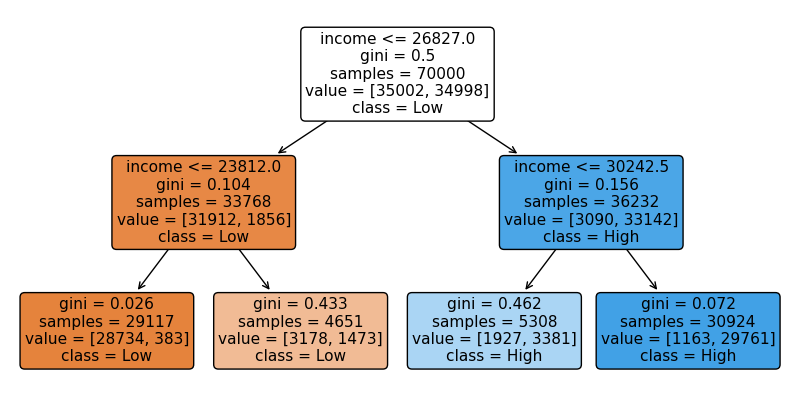

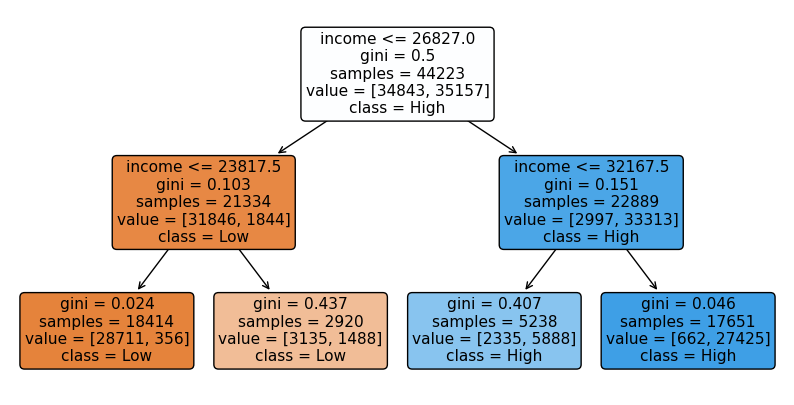

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import graphviz
import os

# Visualize the Decision Tree
plt.figure(figsize=(10,5))
plot_tree(dec_tree, feature_names=X.columns, class_names=['Low', 'High'], filled=True, rounded=True)
plt.show()

# Visualize a single tree from the Random Forest
plt.figure(figsize=(10,5))
plot_tree(rand_forest.estimators_[0], feature_names=X.columns, class_names=['Low', 'High'], filled=True, rounded=True)
plt.show()

Logistic Regression: Accuracy=0.93, Precision=0.93, Recall=0.93, F1 Score=0.93
Decision Tree: Accuracy=0.90, Precision=0.90, Recall=0.89, F1 Score=0.89
Random Forest: Accuracy=0.93, Precision=0.92, Recall=0.94, F1 Score=0.93


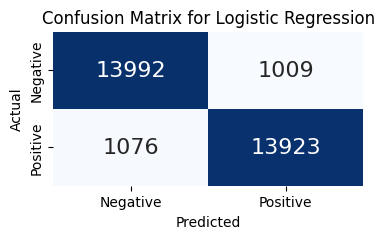

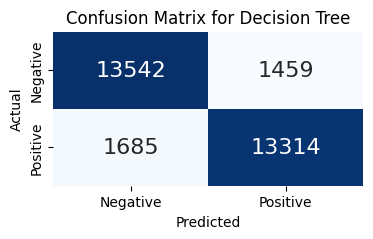

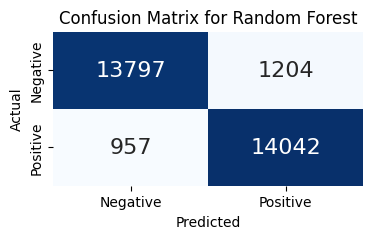

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions
y_pred_log_reg = log_reg.predict(X_test_scaled)
y_pred_dec_tree = dec_tree.predict(X_test)
y_pred_rand_forest = rand_forest.predict(X_test)

# Evaluate the models
def evaluate_model(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1

log_reg_metrics = evaluate_model(y_test, y_pred_log_reg)
dec_tree_metrics = evaluate_model(y_test, y_pred_dec_tree)
rand_forest_metrics = evaluate_model(y_test, y_pred_rand_forest)

# Print the results
print(f"Logistic Regression: Accuracy={log_reg_metrics[0]:.2f}, Precision={log_reg_metrics[1]:.2f}, Recall={log_reg_metrics[2]:.2f}, F1 Score={log_reg_metrics[3]:.2f}")
print(f"Decision Tree: Accuracy={dec_tree_metrics[0]:.2f}, Precision={dec_tree_metrics[1]:.2f}, Recall={dec_tree_metrics[2]:.2f}, F1 Score={dec_tree_metrics[3]:.2f}")
print(f"Random Forest: Accuracy={rand_forest_metrics[0]:.2f}, Precision={rand_forest_metrics[1]:.2f}, Recall={rand_forest_metrics[2]:.2f}, F1 Score={rand_forest_metrics[3]:.2f}")

# Compute confusion matrices
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
conf_matrix_dec_tree = confusion_matrix(y_test, y_pred_dec_tree)
conf_matrix_rand_forest = confusion_matrix(y_test, y_pred_rand_forest)

# Function to plot confusion matrix with increased text size
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(4, 2))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                annot_kws={"size": 16},  # Increase the font size of the annotations
                xticklabels=['Negative', 'Positive'],
                yticklabels=['Negative', 'Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

# Example usage
plot_confusion_matrix(conf_matrix_log_reg, 'Logistic Regression')
plot_confusion_matrix(conf_matrix_dec_tree, 'Decision Tree')
plot_confusion_matrix(conf_matrix_rand_forest, 'Random Forest')

Step 5 - Visualize the results

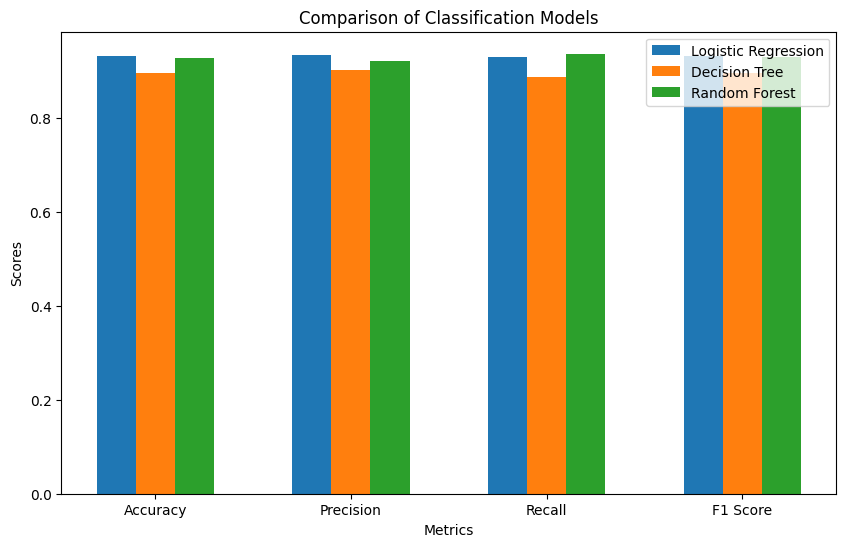

In [ ]:
import matplotlib.pyplot as plt

# Bar plot for model performance
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
log_reg_metrics = list(log_reg_metrics)
dec_tree_metrics = list(dec_tree_metrics)
rand_forest_metrics = list(rand_forest_metrics)

x = range(len(metrics))
width = 0.2

plt.figure(figsize=(10, 6))
plt.bar(x, log_reg_metrics, width, label='Logistic Regression')
plt.bar([p + width for p in x], dec_tree_metrics, width, label='Decision Tree')
plt.bar([p + width*2 for p in x], rand_forest_metrics, width, label='Random Forest')

plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Comparison of Classification Models')
plt.xticks([p + width for p in x], metrics)
plt.legend()
plt.show()

In [ ]:
data

,age,income,purchase_amount,promotion_usage,satisfaction_score,gender_encoded,education_encoded,region_encoded,loyalty_status_encoded,purchase_frequency_encoded,product_category_encoded,target
0,27,40682,18249,0,6,1,0,0,0,0,1,1
1,29,15317,4557,1,6,1,3,3,1,2,2,0
2,37,38849,11822,0,6,1,0,3,2,2,2,1
3,30,11568,4098,0,7,1,2,2,1,0,4,0
4,31,46952,19685,1,5,0,1,1,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,31,19691,7075,0,7,0,1,3,1,1,5,0
99996,36,17428,6873,0,5,1,2,2,1,2,5,0
99997,29,13222,5152,0,5,1,1,3,1,0,2,0
99998,31,40093,16312,1,5,0,0,3,1,0,5,1


In [ ]:
X_train

,age,income,promotion_usage,satisfaction_score,gender_encoded,education_encoded,region_encoded,loyalty_status_encoded,purchase_frequency_encoded,product_category_encoded
15669,33,24956,0,5,0,2,3,1,2,3
68372,33,25359,1,5,1,1,0,1,0,3
84772,32,34173,0,5,1,2,3,1,0,3
30310,30,28711,0,3,0,3,1,2,2,2
42576,31,21977,0,4,1,2,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
80080,26,30236,0,4,1,1,3,1,1,2
32425,36,25302,0,5,1,2,1,1,1,3
88074,23,46152,0,5,0,0,2,1,2,1
6428,31,6938,0,6,1,0,2,2,2,2


In [ ]:
new_data = pd.DataFrame({
    'age': [30],
    'income': [18000],
    'promotion_usage': [0],
    'satisfaction_score': [5],
    'gender_encoded': [1],
    'education_encoded': [3],
    'region_encoded': [0],
    'loyalty_status_encoded':[2],
    'purchase_frequency_encoded':[2],
    'product_category_encoded':[3],
})

# Standardize the new data
new_data_scaled = scaler.transform(new_data)

# Predictions on the new data
new_pred_log_reg = log_reg.predict(new_data_scaled)
new_pred_dec_tree = dec_tree.predict(new_data)
new_pred_rand_forest = rand_forest.predict(new_data)

print(f"Logistic Regression Prediction: {new_pred_log_reg}")
print(f"Decision Tree Prediction: {new_pred_dec_tree}")
print(f"Random Forest Prediction: {new_pred_rand_forest}")

Logistic Regression Prediction: [0]
Decision Tree Prediction: [0]
Random Forest Prediction: [0]


10-fold Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
X_scaled = scaler.transform(X) # Scale the features using the defined scaler
# Perform cross-validation and print the results
log_reg_cv = cross_val_score(log_reg, X_scaled, y, cv=10, scoring='accuracy')
dec_tree_cv = cross_val_score(dec_tree, X, y, cv=10, scoring='accuracy')
rand_forest_cv = cross_val_score(rand_forest, X, y, cv=10, scoring='accuracy')

log_reg_cv_f1 = cross_val_score(log_reg, X_scaled, y, cv=10, scoring='f1')
dec_tree_cv_f1 = cross_val_score(dec_tree, X, y, cv=10, scoring='f1')
rand_forest_cv_f1 = cross_val_score(rand_forest, X, y, cv=10, scoring='f1')

print(f"Logistic Regression CV Accuracy: {log_reg_cv.mean():.2f} ± {log_reg_cv.std():.2f}")
print(f"Logistic Regression CV F1 Score: {log_reg_cv_f1.mean():.2f} ± {log_reg_cv_f1.std():.2f}\n")

print(f"Decision Tree CV Accuracy: {dec_tree_cv.mean():.2f} ± {dec_tree_cv.std():.2f}")
print(f"Decision Tree CV F1 Score: {dec_tree_cv_f1.mean():.2f} ± {dec_tree_cv_f1.std():.2f}\n")

print(f"Random Forest CV Accuracy: {rand_forest_cv.mean():.2f} ± {rand_forest_cv.std():.2f}")
print(f"Random Forest CV F1 Score: {rand_forest_cv_f1.mean():.2f} ± {rand_forest_cv_f1.std():.2f}")

NameError: name 'scaler' is not defined

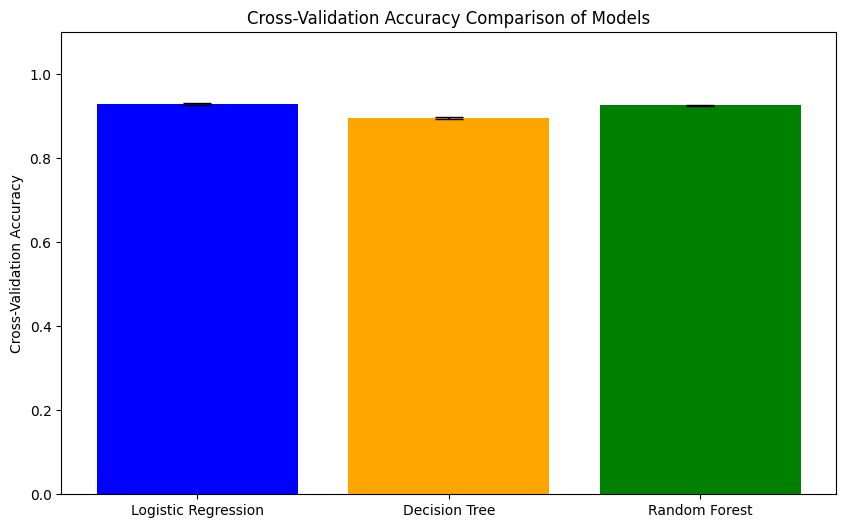

In [ ]:
# Calculate means and standard deviations
log_reg_mean = log_reg_cv.mean()
log_reg_std = log_reg_cv.std()

dec_tree_mean = dec_tree_cv.mean()
dec_tree_std = dec_tree_cv.std()

rand_forest_mean = rand_forest_cv.mean()
rand_forest_std = rand_forest_cv.std()
# Prepare data for plotting
models = ['Logistic Regression', 'Decision Tree', 'Random Forest']
means = [log_reg_mean, dec_tree_mean, rand_forest_mean]
stds = [log_reg_std, dec_tree_std, rand_forest_std]

# Plotting the cross-validation scores
plt.figure(figsize=(10, 6))
plt.bar(models, means, yerr=stds, capsize=10, color=['blue', 'orange', 'green'])
plt.ylabel('Cross-Validation Accuracy')
plt.title('Cross-Validation Accuracy Comparison of Models')
plt.ylim([0, 1.1])
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score

X_scaled = scaler.transform(X) # Scale the features using the defined scaler

# Perform cross-validation and print the results
log_reg_cv = cross_val_score(log_reg, X_scaled, y, cv=5, scoring='accuracy')
dec_tree_cv = cross_val_score(dec_tree, X_scaled, y, cv=5, scoring='accuracy')
rand_forest_cv = cross_val_score(rand_forest, X_scaled, y, cv=5, scoring='accuracy')

log_reg_cv_f1 = cross_val_score(log_reg, X_scaled, y, cv=5, scoring='f1')
dec_tree_cv_f1 = cross_val_score(dec_tree, X_scaled, y, cv=5, scoring='f1')
rand_forest_cv_f1 = cross_val_score(rand_forest, X_scaled, y, cv=5, scoring='f1')

print(f"Logistic Regression CV Accuracy: {log_reg_cv.mean():.2f} ± {log_reg_cv.std():.2f}")
print(f"Logistic Regression CV F1 Score: {log_reg_cv_f1.mean():.2f} ± {log_reg_cv_f1.std():.2f}\n")

print(f"Decision Tree CV Accuracy: {dec_tree_cv.mean():.2f} ± {dec_tree_cv.std():.2f}")
print(f"Decision Tree CV F1 Score: {dec_tree_cv_f1.mean():.2f} ± {dec_tree_cv_f1.std():.2f}\n")

print(f"Random Forest CV Accuracy: {rand_forest_cv.mean():.2f} ± {rand_forest_cv.std():.2f}")
print(f"Random Forest CV F1 Score: {rand_forest_cv_f1.mean():.2f} ± {rand_forest_cv_f1.std():.2f}")

Logistic Regression CV Accuracy: 0.93 ± 0.00
Logistic Regression CV F1 Score: 0.93 ± 0.00

Decision Tree CV Accuracy: 0.89 ± 0.00
Decision Tree CV F1 Score: 0.89 ± 0.00

Random Forest CV Accuracy: 0.93 ± 0.00
Random Forest CV F1 Score: 0.93 ± 0.00


##**Compute ROC Curve**

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Compute ROC curve and ROC area for each model
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, log_reg.predict_proba(X_test_scaled)[:, 1])
roc_auc_log_reg = roc_auc_score(y_test, log_reg.predict_proba(X_test_scaled)[:, 1])

fpr_dec_tree, tpr_dec_tree, _ = roc_curve(y_test, dec_tree.predict_proba(X_test)[:, 1])
roc_auc_dec_tree = roc_auc_score(y_test, dec_tree.predict_proba(X_test)[:, 1])

fpr_rand_forest, tpr_rand_forest, _ = roc_curve(y_test, rand_forest.predict_proba(X_test)[:, 1])
roc_auc_rand_forest = roc_auc_score(y_test, rand_forest.predict_proba(X_test)[:, 1])


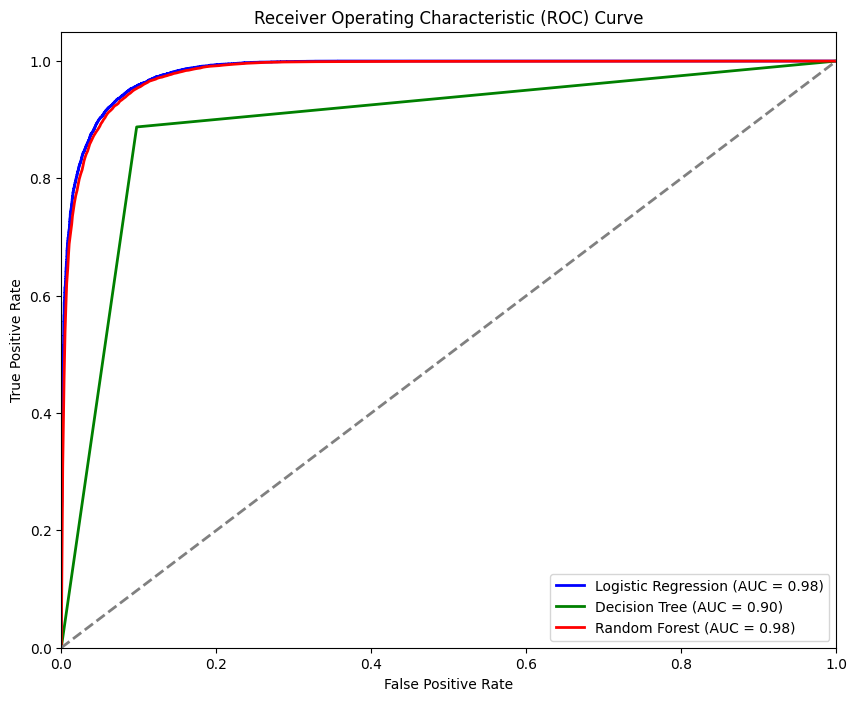

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.plot(fpr_log_reg, tpr_log_reg, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc_log_reg:.2f})')
plt.plot(fpr_dec_tree, tpr_dec_tree, color='green', lw=2, label=f'Decision Tree (AUC = {roc_auc_dec_tree:.2f})')
plt.plot(fpr_rand_forest, tpr_rand_forest, color='red', lw=2, label=f'Random Forest (AUC = {roc_auc_rand_forest:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

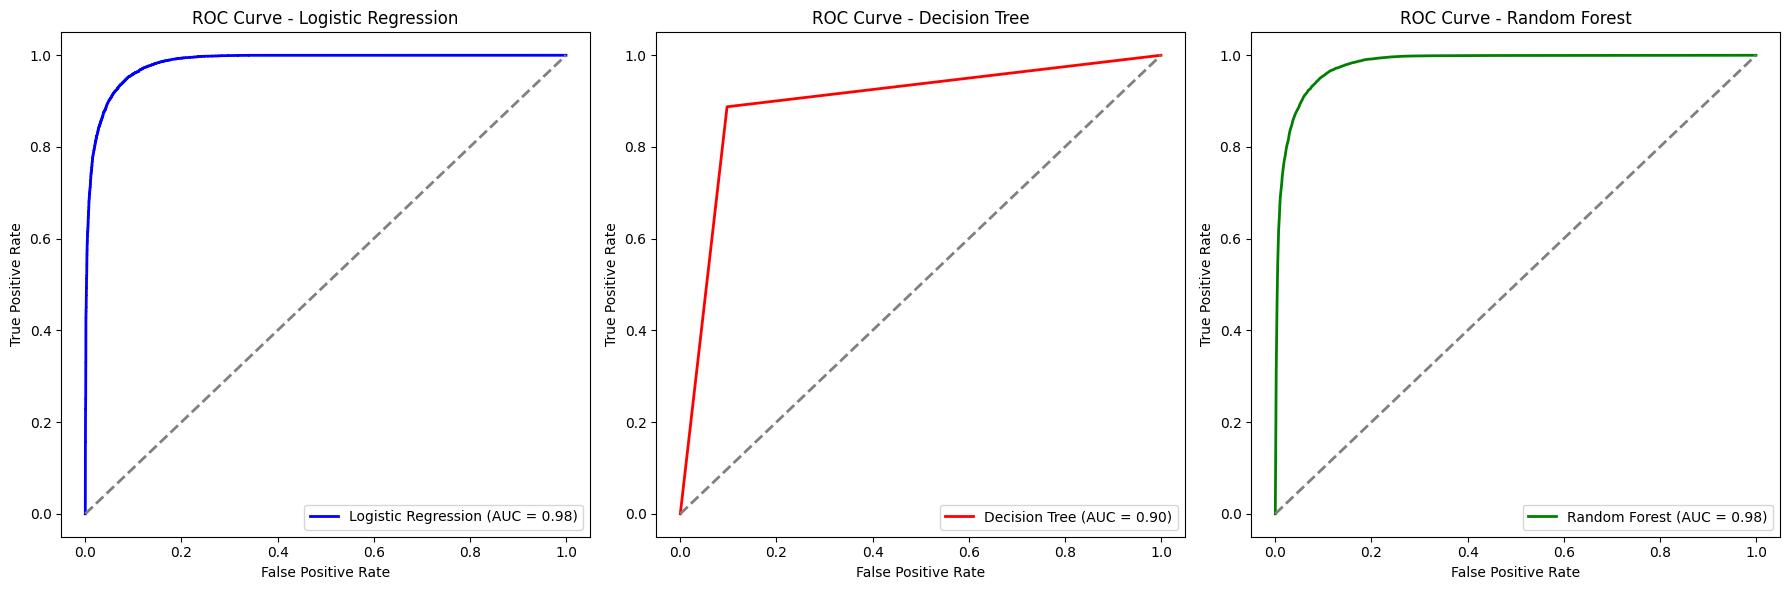

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Compute ROC curve and ROC area for each model
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, log_reg.predict_proba(X_test_scaled)[:, 1])
roc_auc_log_reg = roc_auc_score(y_test, log_reg.predict_proba(X_test_scaled)[:, 1])

fpr_dec_tree, tpr_dec_tree, _ = roc_curve(y_test, dec_tree.predict_proba(X_test)[:, 1])
roc_auc_dec_tree = roc_auc_score(y_test, dec_tree.predict_proba(X_test)[:, 1])

fpr_rand_forest, tpr_rand_forest, _ = roc_curve(y_test, rand_forest.predict_proba(X_test)[:, 1])
roc_auc_rand_forest = roc_auc_score(y_test, rand_forest.predict_proba(X_test)[:, 1])

# Plot ROC curve
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.plot(fpr_log_reg, tpr_log_reg, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc_log_reg:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')

plt.subplot(1, 3, 2)
plt.plot(fpr_dec_tree, tpr_dec_tree, color='red', lw=2, label=f'Decision Tree (AUC = {roc_auc_dec_tree:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend(loc='lower right')

plt.subplot(1, 3, 3)
plt.plot(fpr_rand_forest, tpr_rand_forest, color='green', lw=2, label=f'Random Forest (AUC = {roc_auc_rand_forest:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

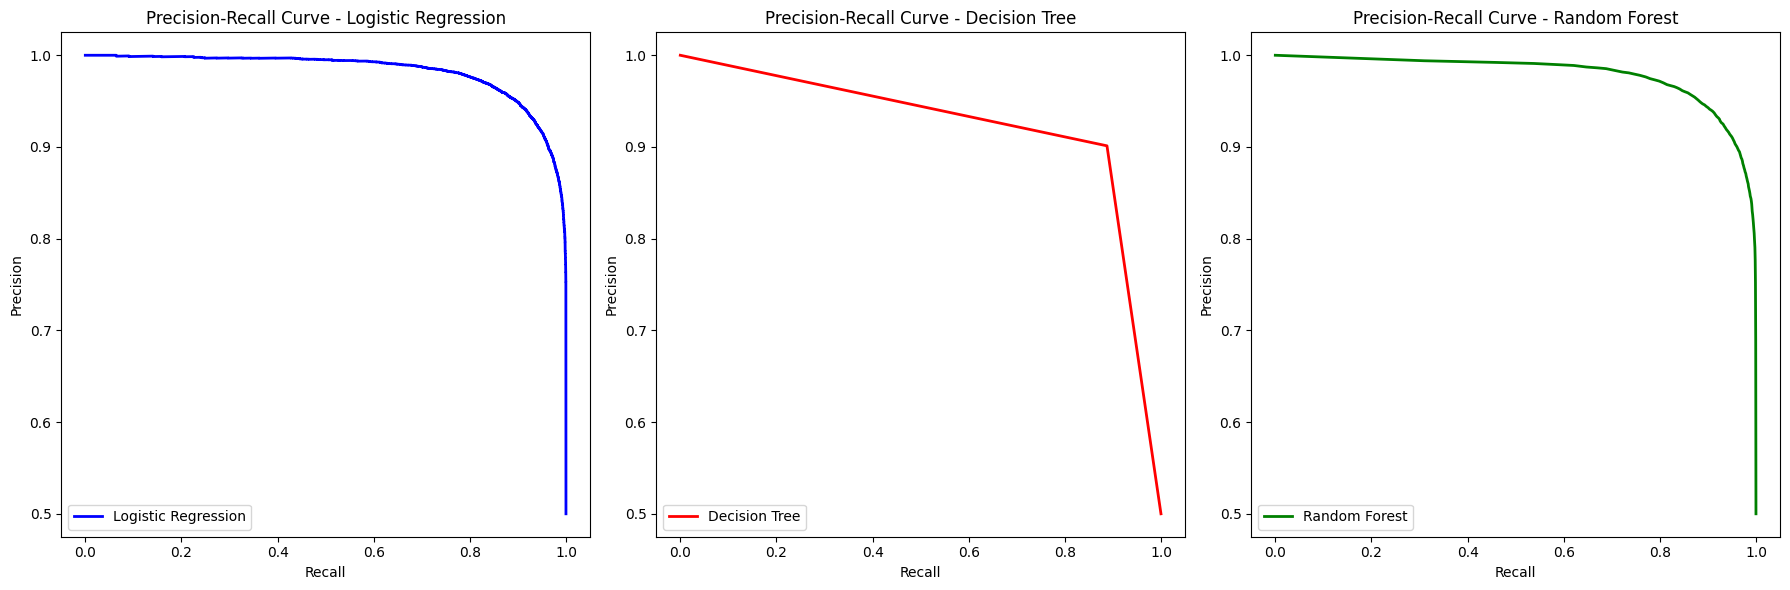

In [ ]:
from sklearn.metrics import precision_recall_curve

# Compute Precision-Recall curve for each model
precision_log_reg, recall_log_reg, _ = precision_recall_curve(y_test, log_reg.predict_proba(X_test_scaled)[:, 1])
precision_dec_tree, recall_dec_tree, _ = precision_recall_curve(y_test, dec_tree.predict_proba(X_test)[:, 1])
precision_rand_forest, recall_rand_forest, _ = precision_recall_curve(y_test, rand_forest.predict_proba(X_test)[:, 1])

# Plot Precision-Recall curve
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.plot(recall_log_reg, precision_log_reg, color='blue', lw=2, label='Logistic Regression')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Logistic Regression')
plt.legend(loc='lower left')

plt.subplot(1, 3, 2)
plt.plot(recall_dec_tree, precision_dec_tree, color='red', lw=2, label='Decision Tree')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Decision Tree')
plt.legend(loc='lower left')

plt.subplot(1, 3, 3)
plt.plot(recall_rand_forest, precision_rand_forest, color='green', lw=2, label='Random Forest')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Random Forest')
plt.legend(loc='lower left')

plt.tight_layout()
plt.show()


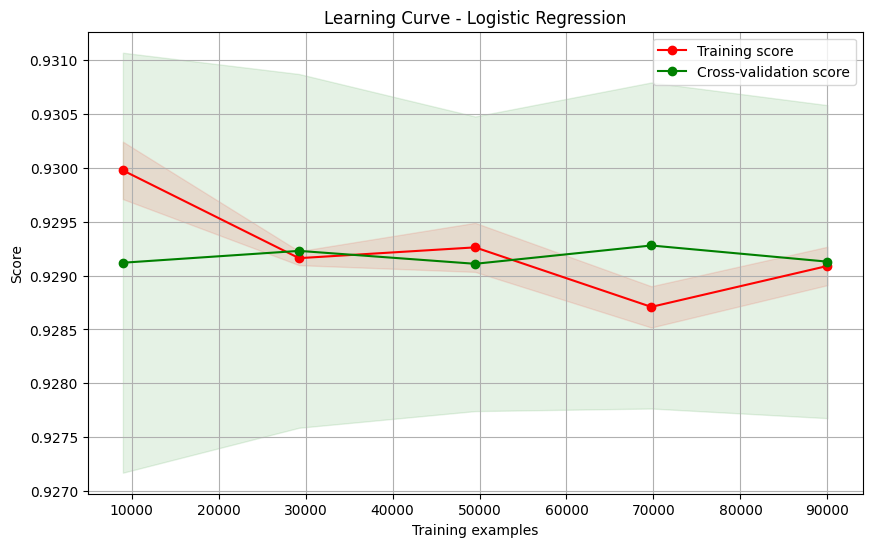

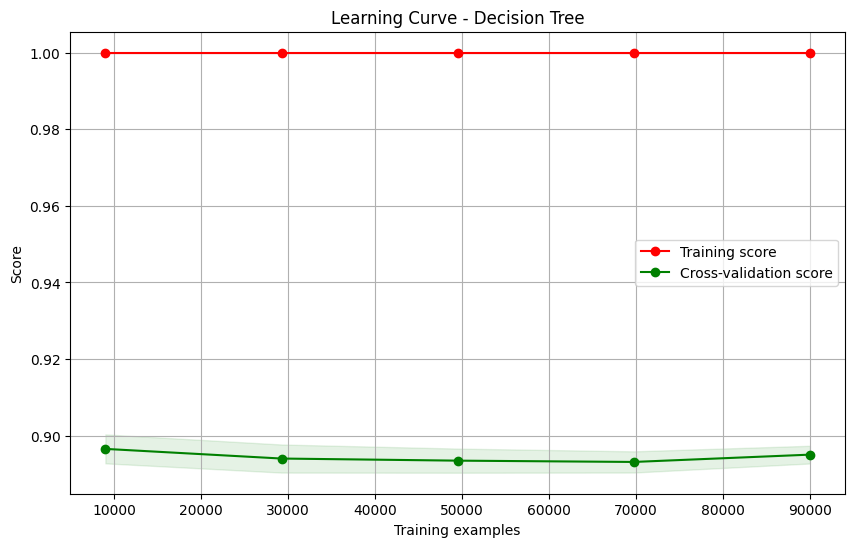

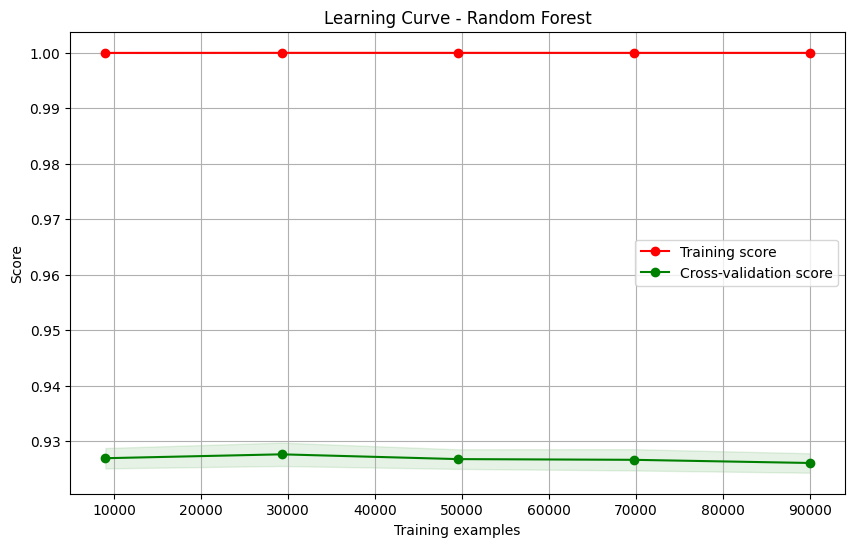

In [ ]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

def plot_learning_curve(estimator, title, X, y, cv=None, n_jobs=None):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel('Training examples')
    plt.ylabel('Score')
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='g')
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
    plt.legend(loc='best')
    plt.show()

# Plot learning curves for each model
plot_learning_curve(log_reg, 'Learning Curve - Logistic Regression', X_scaled, y, cv=10, n_jobs=-1)
plot_learning_curve(dec_tree, 'Learning Curve - Decision Tree', X, y, cv=10, n_jobs=-1)
plot_learning_curve(rand_forest, 'Learning Curve - Random Forest', X, y, cv=10, n_jobs=-1)

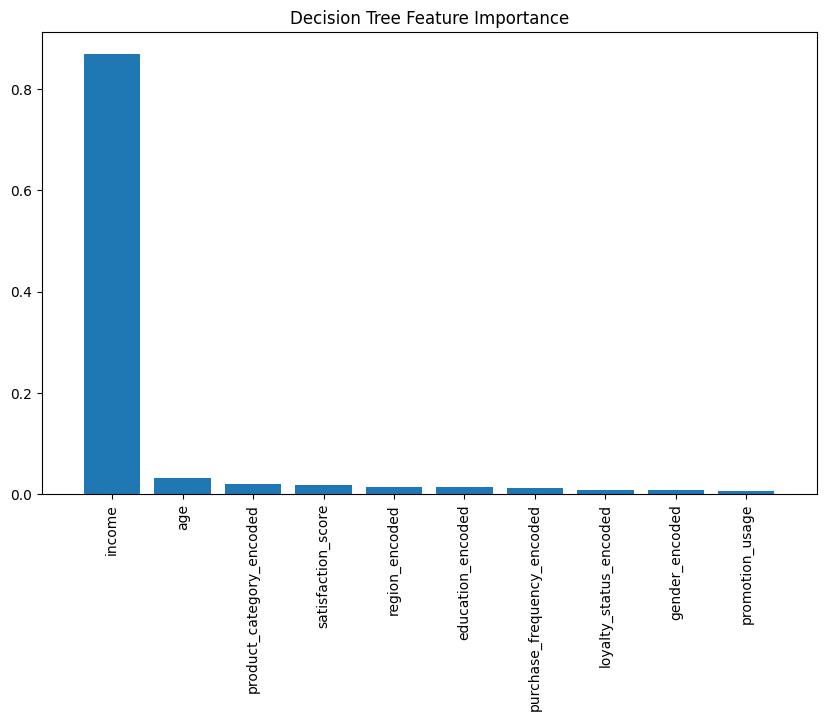

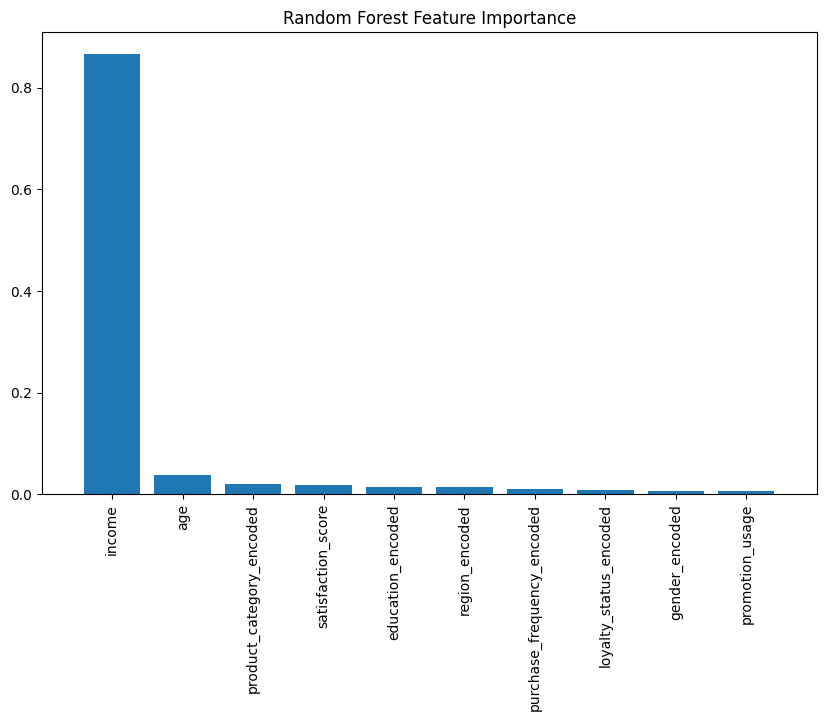

In [ ]:
import numpy as np

def plot_feature_importance(model, X, title):
    feature_importances = model.feature_importances_
    indices = np.argsort(feature_importances)[::-1]
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.bar(range(X.shape[1]), feature_importances[indices], align='center')
    plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
    plt.xlim([-1, X.shape[1]])
    plt.show()

# Plot feature importance for Decision Tree and Random Forest
plot_feature_importance(dec_tree, X, 'Decision Tree Feature Importance')
plot_feature_importance(rand_forest, X, 'Random Forest Feature Importance')



---



#**Unsupervised Learning: Clustering**


---



Step 1: Standardize the Data
Standardize all features to ensure they contribute equally to the clustering algorithm.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_data)


Step 2: Determine the optimal number of clusters in K-Means clustering using the "Elbow Plot".

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

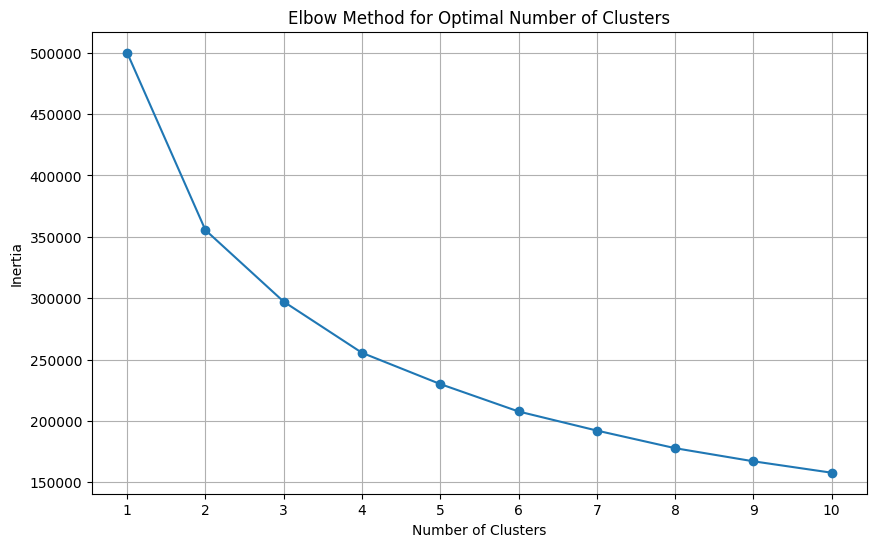

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Range of clusters to try
cluster_range = range(1, 11)
inertia = []

# Calculate inertia for each number of clusters
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow method
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()


Step 3: Perform Clustering

In [ ]:
from sklearn.cluster import KMeans

# Perform K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # You can choose the number of clusters based on your data
clusters = kmeans.fit_predict(X_scaled)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Step 4: Add Cluster Labels to the Data



In [ ]:
# Add cluster labels to the original data
df_data['age','income','promotion_usage','satisfaction_score'] = clusters

<ipython-input-13-35800b3cb590>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['age','income','promotion_usage','satisfaction_score'] = clusters


Step 5: Visualize the Clusters
Visualize the clusters using a pairplot to see the relationships between different features in the context of clusters.

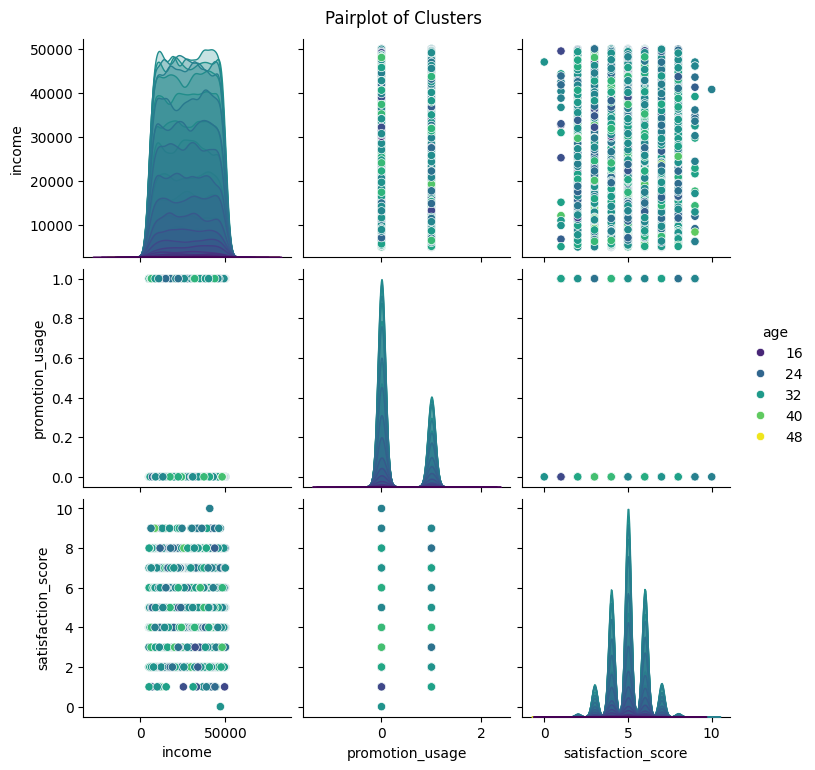

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Visualize clusters using a pairplot
sns.pairplot(df_data, hue='age', vars=['income','promotion_usage','satisfaction_score'], palette='viridis')
plt.suptitle('Pairplot of Clusters', y=1.02)
plt.show()

###Interpretation
####Cluster 1 represents low-income, low-purchase customers.
####Cluster 2 represents high-income, high-purchase customers.
####Cluster 3 represents middle-income, moderate-purchase customers.


Step 6: Analyze the Cluster Centers
Examine the cluster centers to understand the characteristics of each cluster.

In [ ]:
# Cluster centers in original scale
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)

# Create a DataFrame for cluster centers
centers_df = pd.DataFrame(cluster_centers, columns=df_data.columns)  # Exclude the 'Cluster' column
centers_df['Cluster'] = range(1, len(centers_df) + 1)

# Display cluster centers
print(centers_df)

         age        income  purchase_amount  promotion_usage  \
0  29.998703  12448.407551      4360.368015         0.300280   
1  29.987687  42471.278354     14882.932339         0.302621   
2  30.023397  27493.073607      9613.416477         0.299491   

   satisfaction_score  Cluster  
0            5.005790        1  
1            5.013329        2  
2            5.009796        3  


In [ ]:
centers_df

,age,income,purchase_amount,promotion_usage,satisfaction_score,Cluster
0,29.998703,12448.407551,4360.368015,0.300280,5.005790,1
1,29.987687,42471.278354,14882.932339,0.302621,5.013329,2
2,30.023397,27493.073607,9613.416477,0.299491,5.009796,3


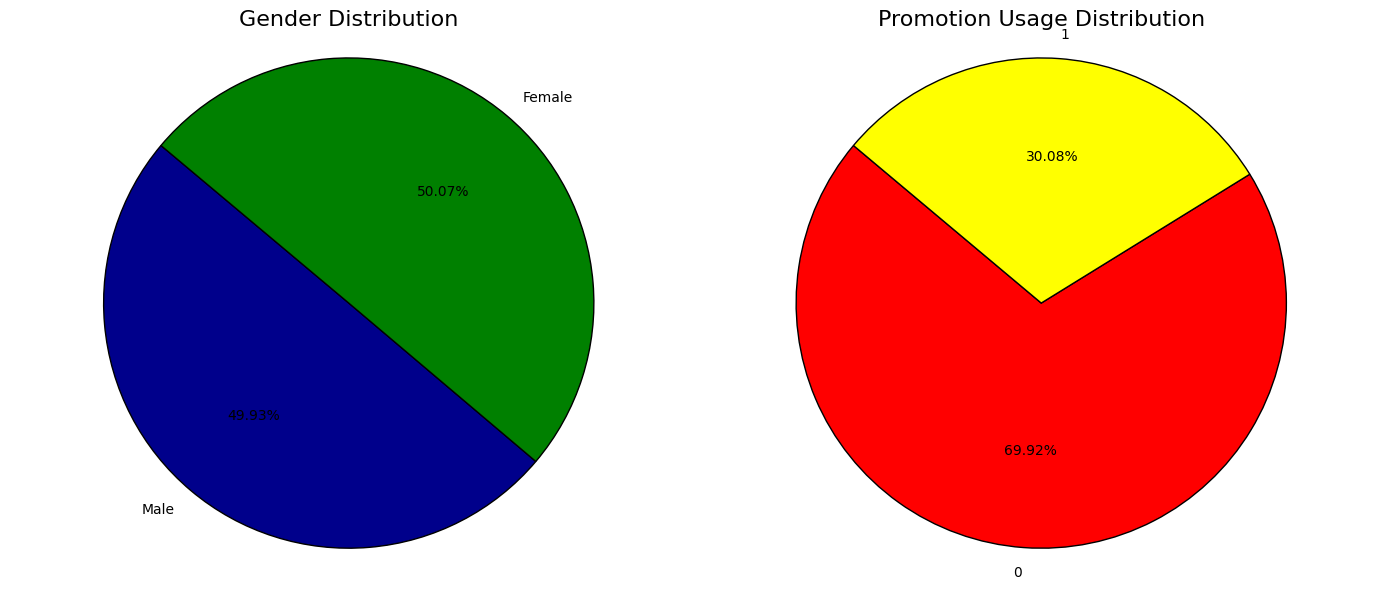

In [ ]:
import matplotlib.pyplot as plt

# Data for Gender
gender_labels = ['Male', 'Female']
gender_sizes = [49.93, 50.07]
gender_colors = ['darkblue', 'green']

# Data for Promotion usage
promotion_labels = ['0', '1']
promotion_sizes = [69.92, 30.08]
promotion_colors = ['red', 'yellow']

# Plot Gender Distribution
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.pie(gender_sizes, labels=gender_labels, autopct='%1.2f%%', colors=gender_colors, startangle=140, wedgeprops={'edgecolor': 'Black'})
plt.title('Gender Distribution', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

# Plot Promotion Usage Distribution
plt.subplot(1, 2, 2)
plt.pie(promotion_sizes, labels=promotion_labels, autopct='%1.2f%%', colors=promotion_colors, startangle=140, wedgeprops={'edgecolor': 'Black'})
plt.title('Promotion Usage Distribution', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

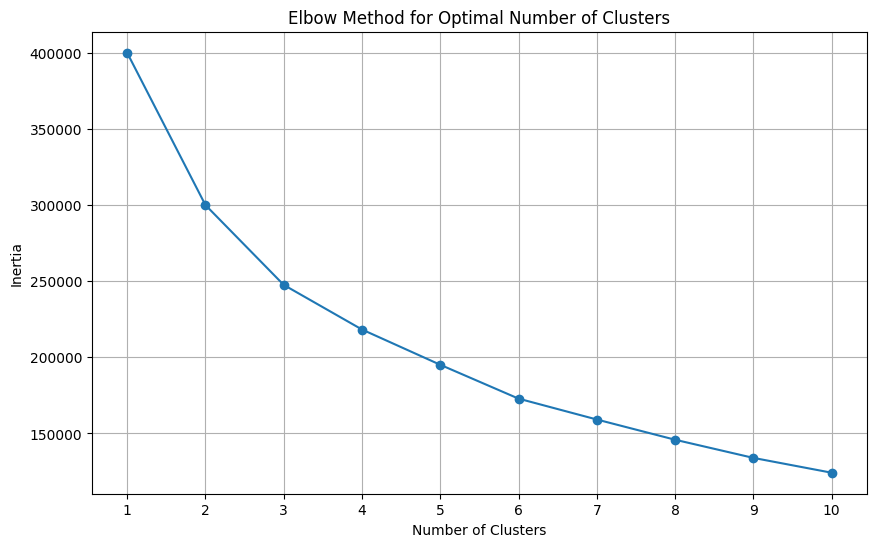

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
<ipython-input-17-31798d6e8ecb>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['Cluster'] = clusters


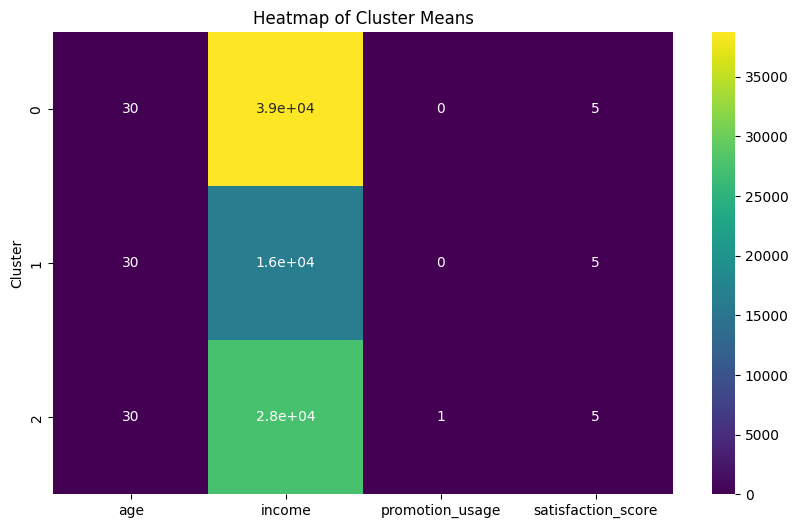

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_data is your DataFrame with the relevant columns
# Ensure df_data has columns 'age', 'income', 'promotion_usage', 'satisfaction_score'

# Select relevant features for clustering
features = ['age', 'income', 'promotion_usage', 'satisfaction_score']
X = df_data[features].copy()

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the Elbow Method
inertia = []
cluster_range = range(1, 11)
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()

# Perform K-Means clustering with the optimal number of clusters (let's assume 3 for this example)
optimal_clusters = 3  # Choose the number of clusters based on the Elbow graph
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the original data
df_data['Cluster'] = clusters

# Calculate the cluster means
cluster_means = df_data.groupby('Cluster')[features].mean()

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_means, annot=True, cmap='viridis')
plt.title('Heatmap of Cluster Means')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

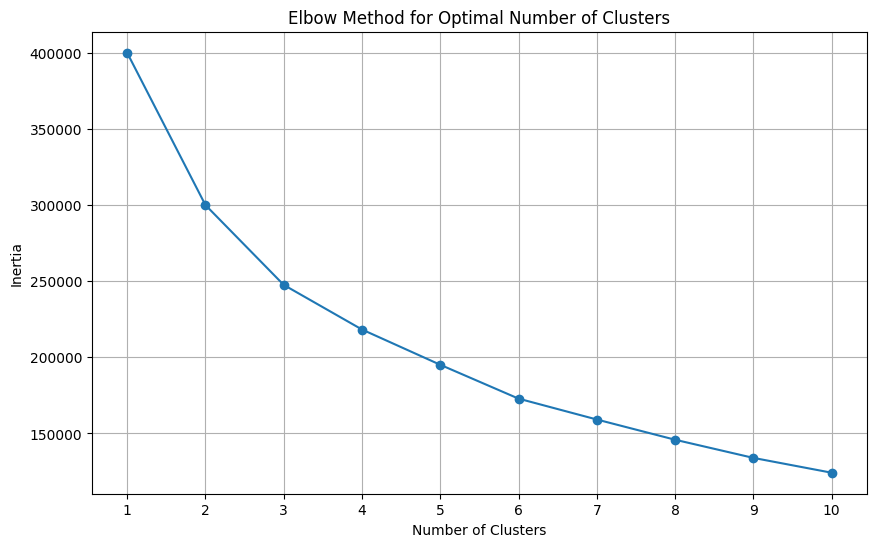

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
<ipython-input-18-bb8ffd317112>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['Cluster'] = clusters


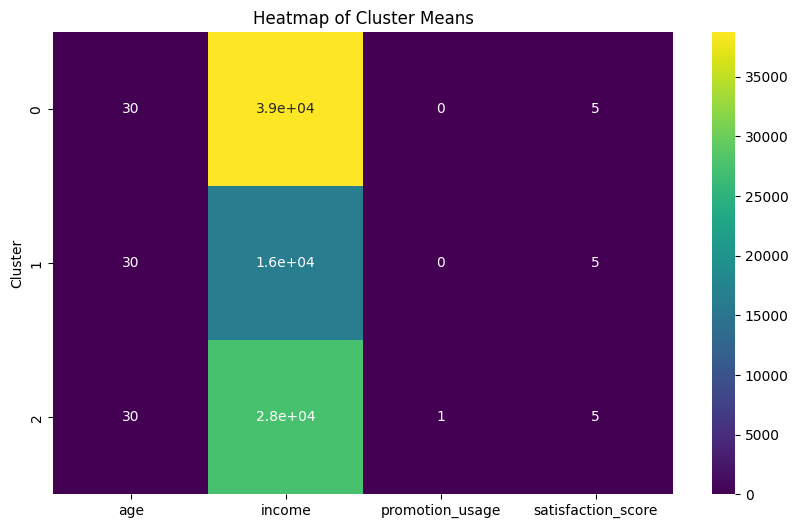

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_data is your DataFrame with the relevant columns
# Ensure df_data has columns 'age', 'income', 'promotion_usage', 'satisfaction_score'

# Select relevant features for clustering
features = ['age', 'income', 'promotion_usage', 'satisfaction_score']

# Label encoding for categorical variables
label_encoders = {}
for column in df_data.columns:
    if df_data[column].dtype == 'object':
        label_encoders[column] = LabelEncoder()
        df_data[column] = label_encoders[column].fit_transform(df_data[column])

X = df_data[features].copy()

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the Elbow Method
inertia = []
cluster_range = range(1, 11)
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()

# Perform K-Means clustering with the optimal number of clusters (let's assume 3 for this example)
optimal_clusters = 3  # Choose the number of clusters based on the Elbow graph
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the original data
df_data['Cluster'] = clusters

# Calculate the cluster means
cluster_means = df_data.groupby('Cluster')[features].mean()

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_means, annot=True, cmap='viridis')
plt.title('Heatmap of Cluster Means')
plt.show()


## **PRESENTATION**

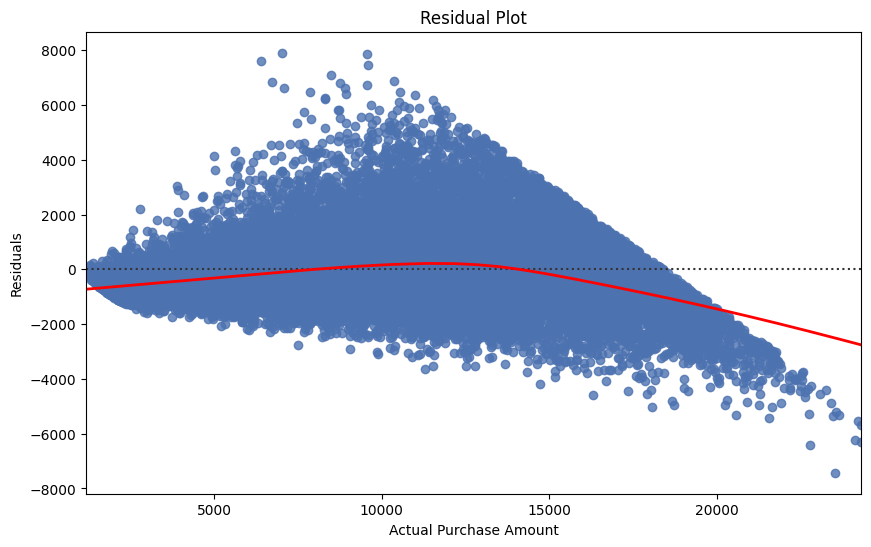

In [ ]:

# Residual plot
plt.figure(figsize=(10, 6))
sns.residplot(x=y_test, y=y_pred, lowess=True, line_kws={'color': 'red', 'lw': 2})
plt.title('Residual Plot')
plt.xlabel('Actual Purchase Amount')
plt.ylabel('Residuals')
plt.show()


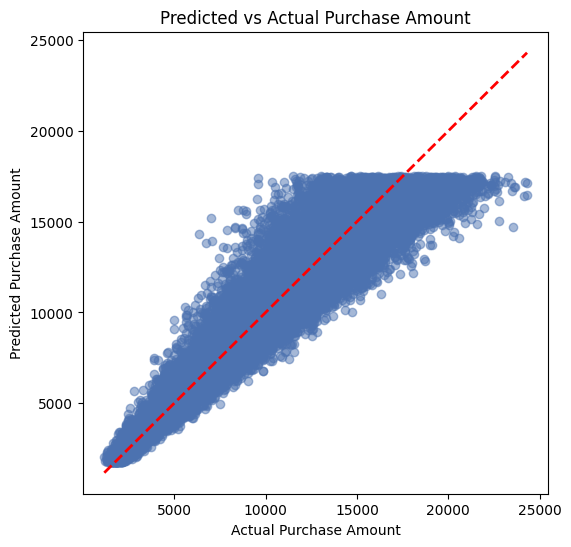

In [ ]:
# Predicted vs Actual plot
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Predicted vs Actual Purchase Amount')
plt.xlabel('Actual Purchase Amount')
plt.ylabel('Predicted Purchase Amount')
plt.show()

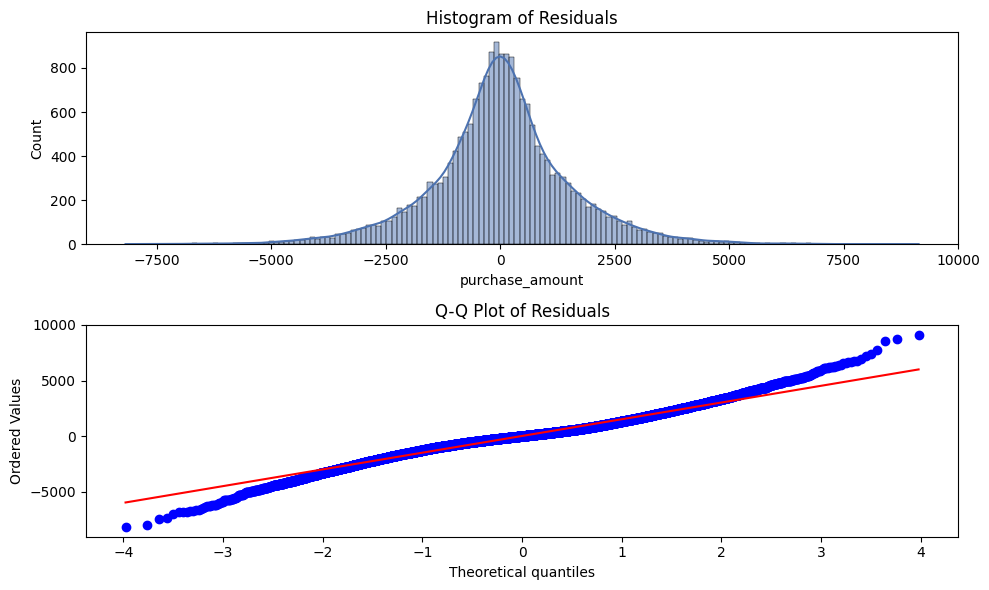

In [ ]:
# Optional: Plotting residuals to visually inspect normality
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# Plot histogram of residuals
plt.subplot(2, 1, 1)
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')

# Plot Q-Q plot of residuals
plt.subplot(2, 1, 2)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')

plt.tight_layout()
plt.show()